Enrich镜像 R(Enrich) kernel

Script='/data/work/scripts/Enrich/Enrich.ipynb'
input1='/data/users/yangdong/yangdong_1ac1874280b1481e90852cb6458b67a1/online/output/PlantPhone/Compare/TM0_TM1/RNA_T_0.5/Conservedmarker_Vasculature_TM0_TM1.csv'
input2='/data/users/yangdong/yangdong_1ac1874280b1481e90852cb6458b67a1/online/output/PlantPhone/Compare/TM0_TM1/RNA_T_0.5/marker_Putative rib_splitedseob_TM0_TM1.csv'
1. 其中input1有两个时期的markergene,可以把GO等图左右排列，方便比较.
2. 另外参照[clusterprofiler-comparecluster.html](https://yulab-smu.top/biomedical-knowledge-mining-book/clusterprofiler-comparecluster.html)做一下`cnetplot`在**不同时期**和**不同clsuter**的**占比比较图**

In [1]:
library(AnnotationDbi)
library(stringr) 
library(clusterProfiler)
library(tidyverse)
library(ggnewscale) 
library(tools)
library(ggpubr) 
library(enrichplot) 
library(ggupset) 
library(stats)
library(data.table)
library(lifecycle)
library(dplyr)
library(ggplot2)
library(topGO) 
library(Rgraphviz) 
library(RColorBrewer)
library(wordcloud) 
library(pathview) 
library(UpSetR) 
library(fgsea)
#library(ITAG4.1_241207.OrgDb)

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, saveRDS, setdiff, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: IRanges

Loading required package: S4Vectors


Attaching package: 'S4Vectors'


Th

1. 学会用`loadDb()`调用对应的数据库，尤其针对于非模式物种需要的自建库，避免的install和library的问题。但是为了check数据库的GID与筛选到的基因名不存在明显的格式问题，需要检查一下`keys(Tomato, keytype = "GID")`
2. `gmt`文件格式的认识
3. kegg代谢通路的认识，涉及到输入文件的准备、计算和可视化

In [2]:
# library
Tomato <-loadDb(file="/data/users/lili10/online/script/Enrich/clusterProfiler/ITAG4.1_241207.OrgDb")
kegglist <- read.csv('/data/users/lili10/lili10_642e569efa3b4d56a57481c396194c66/online/input/Clusterprofiler/ITAG4.1_Gene_KEGGID_KEGGNAME_241225.csv')
gmt_go <- "/data/users/lili10/lili10_642e569efa3b4d56a57481c396194c66/online/input/Enrich/ITAG4.1_description_GO_Gene_241220.gmt"
gmt_kegg <- '/data/users/lili10/lili10_642e569efa3b4d56a57481c396194c66/online/input/Enrich/ITAG4.1_KEGGNAME_KEGGID_Gene_241225.gmt'
# Get key information
kegg2gene <- data.frame(kegglist$KEGGID,kegglist$Gene) 
kegg2name <- data.frame(kegglist$KEGGID,kegglist$KEGGNAME)

In [3]:
# Check the database information
print(Tomato)
class(Tomato)
columns(Tomato)
keys(Tomato, keytype = "GID")

OrgDb object:
| DBSCHEMAVERSION: 2.1
| DBSCHEMA: NOSCHEMA_DB
| ORGANISM: Solanum lycompersicum
| SPECIES: Solanum lycompersicum
| CENTRALID: GID
| Taxonomy ID: 4081
| Db type: OrgDb
| Supporting package: AnnotationDbi



Please see: help('select') for usage information



[1] "OrgDb"
attr(,"package")
[1] "AnnotationDbi"

[1] "Class"       "EVIDENCE"    "EVIDENCEALL" "GENENAME"    "GID"        
 [6] "GO"          "GOALL"       "Goterms"     "KEGGID"      "KEGGNAME"   
[11] "ONTOLOGY"    "ONTOLOGYALL"

[1] "Solyc02g010600.2"   "Solyc00g500019.1"   "Solyc00g500020.1"  
    [4] "Solyc00g500022.1"   "Solyc00g180440.2"   "Solyc00g500024.1"  
    [7] "Solyc00g500028.1"   "Solyc00g500029.1"   "Solyc00g500030.1"  
   [10] "Solyc00g500031.1"   "Solyc00g500032.1"   "Solyc00g500034.1"  
   [13] "Solyc00g500035.1"   "Solyc00g500036.1"   "Solyc00g500037.1"  
   [16] "Solyc00g500041.1"   "Solyc00g500042.2"   "Solyc00g500043.1"  
   [19] "Solyc00g500046.1"   "Solyc00g500047.1"   "Solyc00g277510.2"  
   [22] "Solyc00g500048.1"   "Solyc00g500049.1"   "Solyc00g500051.1"  
   [25] "Solyc00g500052.1"   "Solyc00g500053.2"   "Solyc00g500055.1"  
   [28] "Solyc00g500056.1"   "Solyc00g500057.1"   "Solyc00g500061.1"  
   [31] "Solyc00g500062.1"   "Solyc00g500063.1"   "Solyc00g500066.1"  
   [34] "Solyc00g500067.1"   "Solyc00g500069.1"   "Solyc00g500071.1"  
   [37] "Solyc00g500074.1"   "Solyc00g500075.1"   "Solyc00g500076.1"  
   [40] "Solyc00g500077.1"   "Solyc00g500079.1"   "Solyc00g500080.1"  
   [43] "Solyc00g500081.1"   "Solyc00g500084.1"   "Solyc00g500085.2"  
   [46] "Solyc00g500086.1"   "Solyc00g500087.1"   "Solyc00g500088.2"  
   [49] "Solyc00g500091.2"   "Solyc00g160310.1"   "Solyc00g160300.1"  
   [52] "Solyc00g011660.1"   "Solyc00g500092.2"   "Solyc00g500093.1"  
   [55] "Solyc00g500095.1"   "Solyc00g500096.2"   "Solyc00g011560.1"  
   [58] "Solyc00g500097.1"   "Solyc00g500101.1"   "Solyc00g500102.1"  
   [61] "Solyc00g500103.1"   "Solyc00g500113.1"   "Solyc00g500118.1"  
   [64] "Solyc00g500119.1"   "Solyc00g160340.1"   "Solyc00g160670.1"  
   [67] "Solyc00g500123.1"   "Solyc00g500124.1"   "Solyc00g500125.1"  
   [70] "Solyc00g500126.1"   "Solyc00g500128.1"   "Solyc00g500130.1"  
   [73] "Solyc00g500131.1"   "Solyc00g500132.1"   "Solyc00g500134.1"  
   [76] "Solyc00g500135.1"   "Solyc00g160170.1"   "Solyc00g500137.1"  
   [79] "Solyc00g500138.1"   "Solyc00g500140.1"   "Solyc00g500141.1"  
   [82] "Solyc00g500142.1"   "Solyc00g500147.1"   "Solyc00g500149.1"  
   [85] "Solyc00g500150.1"   "Solyc00g500152.1"   "Solyc00g500153.1"  
   [88] "Solyc00g500154.1"   "Solyc00g500155.1"   "Solyc00g500156.1"  
   [91] "Solyc00g500157.1"   "Solyc00g500158.1"   "Solyc00g160030.1"  
   [94] "Solyc00g316530.1"   "Solyc00g500168.1"   "Solyc00g125990.1"  
   [97] "Solyc00g500171.1"   "Solyc00g500172.1"   "Solyc00g500184.1"  
  [100] "Solyc00g014800.1"   "Solyc00g049210.1"   "Solyc00g500186.1"  
  [103] "Solyc00g500188.1"   "Solyc00g500189.1"   "Solyc00g500191.2"  
  [106] "Solyc00g500192.1"   "Solyc00g500193.1"   "Solyc00g500194.1"  
  [109] "Solyc00g500195.1"   "Solyc00g500196.2"   "Solyc00g500198.1"  
  [112] "Solyc00g500200.1"   "Solyc00g500201.1"   "Solyc00g500202.1"  
  [115] "Solyc00g500204.1"   "Solyc00g500205.1"   "Solyc00g160190.1"  
  [118] "Solyc00g500207.1"   "Solyc00g500208.1"   "Solyc00g500209.1"  
  [121] "Solyc00g500213.1"   "Solyc00g500214.1"   "Solyc00g322630.1"  
  [124] "Solyc00g500216.2"   "Solyc00g500218.1"   "Solyc00g266110.1"  
  [127] "Solyc00g254910.1"   "Solyc00g500219.1"   "Solyc00g500220.1"  
  [130] "Solyc00g500222.2"   "Solyc03g042528.2"   "Solyc03g042550.2"  
  [133] "Solyc00g500224.1"   "Solyc00g047180.1"   "Solyc00g500225.1"  
  [136] "Solyc00g500228.1"   "Solyc00g500237.1"   "Solyc00g020040.1"  
  [139] "Solyc00g500241.1"   "Solyc00g500244.1"   "Solyc00g160210.1"  
  [142] "Solyc00g500247.1"   "Solyc00g500248.1"   "Solyc00g500249.1"  
  [145] "Solyc00g500250.1"   "Solyc00g500252.1"   "Solyc00g500253.1"  
  [148] "Solyc00g021640.2"   "Solyc00g500254.1"   "Solyc00g160530.1"  
  [151] "Solyc00g500275.1"   "Solyc00g500276.1"   "Solyc00g052430.3"  
  [154] "Solyc00g500278.1"   "Solyc00g500279.1"   "Solyc00g500280.1"  
  [157] "Solyc00g160230.1"   "Solyc00g500284.1"   "Solyc00g500285.1"  
  [160] "Solyc00g500286.1"   "Solyc00g500287.1"   "Solyc00g500290.2"  
  [163] "Solyc00g500291.1"   "Solyc00g500293.1"   "Solyc00g500295.1"  
  [166] "Solyc00g500296.1"   "Solyc00g500297.1"   "Solyc00g500298.1"  
  [169] "Solyc00g171810.4"  

In [ ]:
file='/data/users/yangdong/yangdong_1ac1874280b1481e90852cb6458b67a1/online/output/PlantPhone/Compare/TM0_TM1/RNA_T_0.5/Conservedmarker_Vasculature_TM0_TM1.csv'
res <- read.csv(file, row.names = 1)
head(res)
file_prefix <- basename(file)
print(file_prefix)

TM1_p_val     TM1_avg_log2FC TM1_pct.1 TM1_pct.2
MT-rrn26              1.183961e-237  2.023743      0.756     0.576    
gene:Solyc12g056290.2 6.746384e-274  2.751336      0.487     0.187    
gene:Solyc00g500164.1 9.578979e-158  1.801340      0.633     0.438    
gene:Solyc00g160750.1 1.060475e-152  2.217754      0.418     0.195    
gene:Solyc07g007755.2 5.234449e-117 -1.423717      0.424     0.656    
gene:Solyc06g074820.3 1.171698e-103 -1.179514      0.681     0.804    
                      TM1_p_val_adj TM0_p_val     TM0_avg_log2FC TM0_pct.1
MT-rrn26              3.384588e-233  0.000000e+00  2.3788432     0.712    
gene:Solyc12g056290.2 1.928589e-269 1.329808e-110  3.1164080     0.256    
gene:Solyc00g500164.1 2.738343e-153  8.739389e-84  2.4489730     0.250    
gene:Solyc00g160750.1 3.031581e-148  3.638643e-35  2.1254329     0.108    
gene:Solyc07g007755.2 1.496372e-112  2.075218e-84 -0.8138965     0.424    
gene:Solyc06g074820.3  3.349533e-99  3.886129e-89 -0.7733216     0.550    
                      TM0_pct.2 TM0_p_val_adj max_pval      minimump_p_val
MT-rrn26              0.367      0.000000e+00 1.183961e-237  0.000000e+00 
gene:Solyc12g056290.2 0.073     3.801523e-106 1.329808e-110 1.349277e-273 
gene:Solyc00g500164.1 0.097      2.498329e-79  8.739389e-84 1.915796e-157 
gene:Solyc00g160750.1 0.047      1.040179e-30  3.638643e-35 2.120951e-152 
gene:Solyc07g007755.2 0.661      5.932427e-80  2.075218e-84 1.046890e-116 
gene:Solyc06g074820.3 0.763      1.110928e-84  3.886129e-89 2.343396e-103

[1] "Conservedmarker_Vasculature_TM0_TM1.csv"


In [19]:
# Set the sample name for two groups
sample1='TM0'
sample2='TM1'

# Get DEG1
log2fc=paste0(sample1,'_avg_log2FC')
log2fc
p_val_adj=paste0(sample1,'_p_val_adj')
p_val_adj

# Convert column names to symbols for use in dplyr
log2fc_1 <- sym(log2fc)
p_val_adj_1 <- sym(p_val_adj)

# Process the data
deg1 <- rownames_to_column(res, var = "Gene") %>%
    filter(abs(!!log2fc_1) > 1 & !!p_val_adj_1 < 0.05) %>%
    filter(!is.na(Gene) & !duplicated(Gene)) %>%
    { 
        # 判断行数并排序截断
        if(nrow(.) > 3000) {
            arrange(., desc(abs(!!log2fc_sym))) %>% 
            slice_head(n = 3000)
        } else {
            .
        }
    }
deg1$Gene <- sub("^gene:", "", deg1$Gene)
# 查看结果
head(deg1)

[1] "TM0_avg_log2FC"

[1] "TM0_p_val_adj"

Gene             TM1_p_val     TM1_avg_log2FC TM1_pct.1 TM1_pct.2
1 MT-rrn26         1.183961e-237 2.023743       0.756     0.576    
2 Solyc12g056290.2 6.746384e-274 2.751336       0.487     0.187    
3 Solyc00g500164.1 9.578979e-158 1.801340       0.633     0.438    
4 Solyc00g160750.1 1.060475e-152 2.217754       0.418     0.195    
5 Solyc10g048060.2  3.172158e-92 1.919658       0.271     0.109    
6 Solyc11g051176.1  2.443937e-87 1.407254       0.606     0.442    
  TM1_p_val_adj TM0_p_val     TM0_avg_log2FC TM0_pct.1 TM0_pct.2 TM0_p_val_adj
1 3.384588e-233  0.000000e+00 2.378843       0.712     0.367      0.000000e+00
2 1.928589e-269 1.329808e-110 3.116408       0.256     0.073     3.801523e-106
3 2.738343e-153  8.739389e-84 2.448973       0.250     0.097      2.498329e-79
4 3.031581e-148  3.638643e-35 2.125433       0.108     0.047      1.040179e-30
5  9.068249e-88  1.311619e-33 1.597309       0.101     0.048      3.749525e-29
6  6.986482e-83  2.720632e-23 1.124392       0.257     0.182      7.777469e-19
  max_pval      minimump_p_val
1 1.183961e-237  0.000000e+00 
2 1.329808e-110 1.349277e-273 
3  8.739389e-84 1.915796e-157 
4  3.638643e-35 2.120951e-152 
5  1.311619e-33  6.344316e-92 
6  2.720632e-23  4.887874e-87

In [20]:
# Get DEG2
log2fc=paste0(sample2,'_avg_log2FC')
p_val_adj=paste0(sample2,'_p_val_adj')
# Convert column names to symbols for use in dplyr
log2fc_2 <- sym(log2fc)
p_val_adj_2 <- sym(p_val_adj)

# Process the data
deg2 <- rownames_to_column(res, var = "Gene") %>%
    filter(abs(!!log2fc_2) > 1 & !!p_val_adj_2 < 0.05) %>%
    filter(!is.na(Gene) & !duplicated(Gene)) %>%
    { 
        # 判断行数并排序截断
        if(nrow(.) > 3000) {
            arrange(., desc(abs(!!log2fc_sym))) %>% 
            slice_head(n = 3000)
        } else {
            .
        }
    }
deg2$Gene <- sub("^gene:", "", deg2$Gene)
# 查看结果
head(deg2)

Gene             TM1_p_val     TM1_avg_log2FC TM1_pct.1 TM1_pct.2
1 MT-rrn26         1.183961e-237  2.023743      0.756     0.576    
2 Solyc12g056290.2 6.746384e-274  2.751336      0.487     0.187    
3 Solyc00g500164.1 9.578979e-158  1.801340      0.633     0.438    
4 Solyc00g160750.1 1.060475e-152  2.217754      0.418     0.195    
5 Solyc07g007755.2 5.234449e-117 -1.423717      0.424     0.656    
6 Solyc06g074820.3 1.171698e-103 -1.179514      0.681     0.804    
  TM1_p_val_adj TM0_p_val     TM0_avg_log2FC TM0_pct.1 TM0_pct.2 TM0_p_val_adj
1 3.384588e-233  0.000000e+00  2.3788432     0.712     0.367      0.000000e+00
2 1.928589e-269 1.329808e-110  3.1164080     0.256     0.073     3.801523e-106
3 2.738343e-153  8.739389e-84  2.4489730     0.250     0.097      2.498329e-79
4 3.031581e-148  3.638643e-35  2.1254329     0.108     0.047      1.040179e-30
5 1.496372e-112  2.075218e-84 -0.8138965     0.424     0.661      5.932427e-80
6  3.349533e-99  3.886129e-89 -0.7733216     0.550     0.763      1.110928e-84
  max_pval      minimump_p_val
1 1.183961e-237  0.000000e+00 
2 1.329808e-110 1.349277e-273 
3  8.739389e-84 1.915796e-157 
4  3.638643e-35 2.120951e-152 
5  2.075218e-84 1.046890e-116 
6  3.886129e-89 2.343396e-103

In [21]:
# Save DEG1 and DEG2
folder_target = '/data/work/output/Enrich/TM0_TM1/'
dir.create(folder_target, recursive = TRUE, showWarnings = FALSE)

file_prefix <- basename(file)
file_target_deg1 <- str_c(folder_target,'deg1_', file_prefix)
write.csv(deg1, file = file_target_deg1, row.names = FALSE)

file_target_deg2 <- str_c(folder_target,'deg2_', file_prefix)
write.csv(deg2, file = file_target_deg2, row.names = FALSE)

#### Read the filtered genes list.

In [23]:
base_theme <- theme(
    plot.title = element_text(size = 16, hjust = 0.5, vjust = 1)
)

res1 <- read.csv(file_target_deg1, row.names = 1)
res1 <- rownames_to_column(res1, var = "Gene") %>% filter(!is.na(Gene) & !duplicated(Gene))
gene1 <- pull(res1, Gene)
head(gene1)
geneList1 <- res1[[log2fc_1]]
head(geneList1)
names(geneList1) <- gene1    
file_prefix1 <- file_path_sans_ext(basename(file_target_deg1))
head(gene1)

res2 <- read.csv(file_target_deg2, row.names = 1)
res2 <- rownames_to_column(res2, var = "Gene") %>% filter(!is.na(Gene) & !duplicated(Gene))
gene2 <- pull(res2, Gene)
geneList2 <- res2[[log2fc_2]]
names(geneList2) <- gene2   
file_prefix2 <- file_path_sans_ext(basename(file_target_deg2))
head(gene2)

[1] "MT-rrn26"         "Solyc12g056290.2" "Solyc00g500164.1" "Solyc00g160750.1"
[5] "Solyc10g048060.2" "Solyc11g051176.1"

[1] 2.378843 3.116408 2.448973 2.125433 1.597309 1.124392

[1] "MT-rrn26"         "Solyc12g056290.2" "Solyc00g500164.1" "Solyc00g160750.1"
[5] "Solyc10g048060.2" "Solyc11g051176.1"

[1] "MT-rrn26"         "Solyc12g056290.2" "Solyc00g500164.1" "Solyc00g160750.1"
[5] "Solyc07g007755.2" "Solyc06g074820.3"

In [24]:
ego1 <- enrichGO(
    gene = gene1,
    OrgDb = Tomato,
    keyType = 'GID',
    ont = 'ALL',
    qvalueCutoff = 0.01,
    pvalueCutoff = 0.01
)

ego2 <- enrichGO(
    gene = gene2,
    OrgDb = Tomato,
    keyType = 'GID',
    ont = 'ALL',
    qvalueCutoff = 0.01,
    pvalueCutoff = 0.01
)

Here we find so many scores for marker-genes
- ONTOLOGY: BP/MF/CC
- ID: GO term name
- Description: what is the meaning GO term ID
- GeneRatio: The ratio of the number of genes in the input list that are annotated to the GO term to the total number of genes in the input list
- BgRatio: The ratio of the number of genes in the background list that are annotated to the GO term to the total number of genes in the background list
- RichFactor: The ratio of GeneRatio to BgRatio, indicating the degree of enrichment
- FoldEnrichment: The ratio of the observed gene count to the expected gene count
- zScore: A measure of the statistical significance of the enrichment
- pvalue: The probability that the observed enrichment is due to random chance
- p.adjust: The adjusted p-value for multiple testing correction
- qvalue: The false discovery rate (FDR) adjusted p-value

In [25]:
ego_df1 <- as.data.frame(ego1)
head(ego_df1)

ego_df2 <- as.data.frame(ego2)
head(ego_df2)

write.csv(ego_df1, str_c(folder_target, file_prefix1, "_df_go.csv"), row.names = FALSE)
write.csv(ego_df2, str_c(folder_target, file_prefix2, "_df_go.csv"), row.names = FALSE)

ONTOLOGY ID         Description                              
GO:0080170 BP       GO:0080170 hydrogen peroxide transmembrane transport
GO:0010582 BP       GO:0010582 floral meristem determinacy              
GO:0010022 BP       GO:0010022 meristem determinacy                     
GO:0010223 BP       GO:0010223 secondary shoot formation                
GO:0010346 BP       GO:0010346 shoot axis formation                     
GO:0009798 BP       GO:0009798 axis specification                       
           GeneRatio BgRatio   RichFactor FoldEnrichment zScore    pvalue      
GO:0080170 4/92      32/25769  0.12500000 35.012228      11.523734 5.067076e-06
GO:0010582 6/92      136/25769 0.04411765 12.357257       7.948869 9.505799e-06
GO:0010022 6/92      158/25769 0.03797468 10.636626       7.272813 2.229838e-05
GO:0010223 7/92      249/25769 0.02811245  7.874236       6.524480 3.149896e-05
GO:0010346 7/92      249/25769 0.02811245  7.874236       6.524480 3.149896e-05
GO:0009798 9/92      450/25769 0.02000000  5.601957       5.895052 3.364830e-05
           p.adjust    qvalue     
GO:0080170 0.005061838 0.003907384
GO:0010582 0.005061838 0.003907384
GO:0010022 0.005972573 0.004610407
GO:0010223 0.005972573 0.004610407
GO:0010346 0.005972573 0.004610407
GO:0009798 0.005972573 0.004610407
           geneID                                                                                                                                                  
GO:0080170 Solyc11g069430.2/Solyc09g007770.3/Solyc08g066840.3/Solyc05g055990.4                                                                                     
GO:0010582 Solyc02g081120.4/Solyc05g056620.2/Solyc03g117230.1/Solyc06g064840.4/Solyc05g013540.1/Solyc02g089210.4                                                   
GO:0010022 Solyc02g081120.4/Solyc05g056620.2/Solyc03g117230.1/Solyc06g064840.4/Solyc05g013540.1/Solyc02g089210.4                                                   
GO:0010223 Solyc02g083950.3/Solyc11g069890.4/Solyc10g076790.2/Solyc05g013540.1/Solyc09g005070.1/Solyc01g080770.3/Solyc01g101070.3                                  
GO:0010346 Solyc02g083950.3/Solyc11g069890.4/Solyc10g076790.2/Solyc05g013540.1/Solyc09g005070.1/Solyc01g080770.3/Solyc01g101070.3                                  
GO:0009798 Solyc02g083950.3/Solyc09g009620.1/Solyc03g117230.1/Solyc04g051540.3/Solyc03g082840.3/Solyc05g013540.1/Solyc12g095870.3/Solyc09g072630.3/Solyc08g066050.3
           Count
GO:0080170 4    
GO:0010582 6    
GO:0010022 6    
GO:0010223 7    
GO:0010346 7    
GO:0009798 9

ONTOLOGY ID        
GO:0009768 BP       GO:0009768
GO:0009765 BP       GO:0009765
GO:0019684 BP       GO:0019684
GO:0019253 BP       GO:0019253
GO:0019685 BP       GO:0019685
GO:0015977 BP       GO:0015977
           Description                                       GeneRatio
GO:0009768 photosynthesis, light harvesting in photosystem I 13/243   
GO:0009765 photosynthesis, light harvesting                  14/243   
GO:0019684 photosynthesis, light reaction                    20/243   
GO:0019253 reductive pentose-phosphate cycle                 6/243    
GO:0019685 photosynthesis, dark reaction                     6/243    
GO:0015977 carbon fixation                                   6/243    
           BgRatio   RichFactor FoldEnrichment zScore    pvalue      
GO:0009768 35/25769  0.37142857 39.388242      22.173319 4.146730e-18
GO:0009765 57/25769  0.24561404 26.046206      18.469858 1.619914e-16
GO:0019684 316/25769 0.06329114  6.711726       9.967667 2.617961e-11
GO:0019253 32/25769  0.18750000 19.883488      10.428704 4.878365e-07
GO:0019685 37/25769  0.16216216 17.196530       9.619183 1.203129e-06
GO:0015977 43/25769  0.13953488 14.797014       8.834568 3.009353e-06
           p.adjust     qvalue      
GO:0009768 7.845612e-15 7.555778e-15
GO:0009765 1.532438e-13 1.475827e-13
GO:0019684 1.651061e-08 1.590067e-08
GO:0019253 2.307467e-04 2.222224e-04
GO:0019685 4.552638e-04 4.384454e-04
GO:0015977 9.489493e-04 9.138929e-04
           geneID                                                                                                                                                                                                                                                                                                                                             
GO:0009768 Solyc07g047850.3/Solyc01g105030.3/Solyc06g074200.4/Solyc03g005760.1/Solyc02g070940.1/Solyc12g011450.2/Solyc02g071030.2/Solyc03g005770.4/Solyc05g056050.3/Solyc10g006230.4/Solyc03g005780.3/Solyc07g063600.3/Solyc12g011280.2                                                                                                                       
GO:0009765 Solyc07g047850.3/Solyc01g105030.3/Solyc06g074200.4/Solyc03g005760.1/Solyc02g070940.1/Solyc12g011450.2/Solyc02g071030.2/Solyc03g005770.4/Solyc05g056050.3/Solyc10g006230.4/Solyc03g005780.3/Solyc03g096850.4/Solyc07g063600.3/Solyc12g011280.2                                                                                                      
GO:0019684 Solyc07g047850.3/Solyc02g065400.3/Solyc07g066150.1/Solyc02g079950.3/Solyc01g105030.3/Solyc06g074200.4/Solyc03g005760.1/Solyc02g070940.1/Solyc12g011450.2/Solyc02g071030.2/Solyc03g005770.4/Solyc05g056050.3/Solyc12g005630.2/Solyc10g006230.4/Solyc10g077120.3/Solyc06g084050.4/Solyc03g005780.3/Solyc03g096850.4/Solyc07g063600.3/Solyc12g011280.2
GO:0019253 Solyc03g034220.3/Solyc04g082630.3/Solyc02g063150.3/Solyc10g018300.3/Solyc05g052600.4/Solyc08g076220.3                                                                                                                                                                                                                                              
GO:0019685 Solyc03g034220.3/Solyc04g082630.3/Solyc02g063150.3/Solyc10g018300.3/Solyc05g052600.4/Solyc08g076220.3                                                                                                                                                                                                                                              
GO:0015977 Solyc03g034220.3/Solyc04g082630.3/Solyc02g063150.3/Solyc10g018300.3/Solyc05g052600.4/Solyc08g076220.3                                                                                                                                                                                                                                              
           Count
GO:0009768 13   
GO:0009765 14   
GO:0019684 20   
GO:0019253  6   
GO:001

## The visualization of GO enrichement
### p1 dotplot()
- 左侧是富集到的GO条目的解释，右侧是条目分到的三个大类
- 圆圈的大小表示富集到相应GO通路的数目，颜色代表可信度，越红代表可信度更高

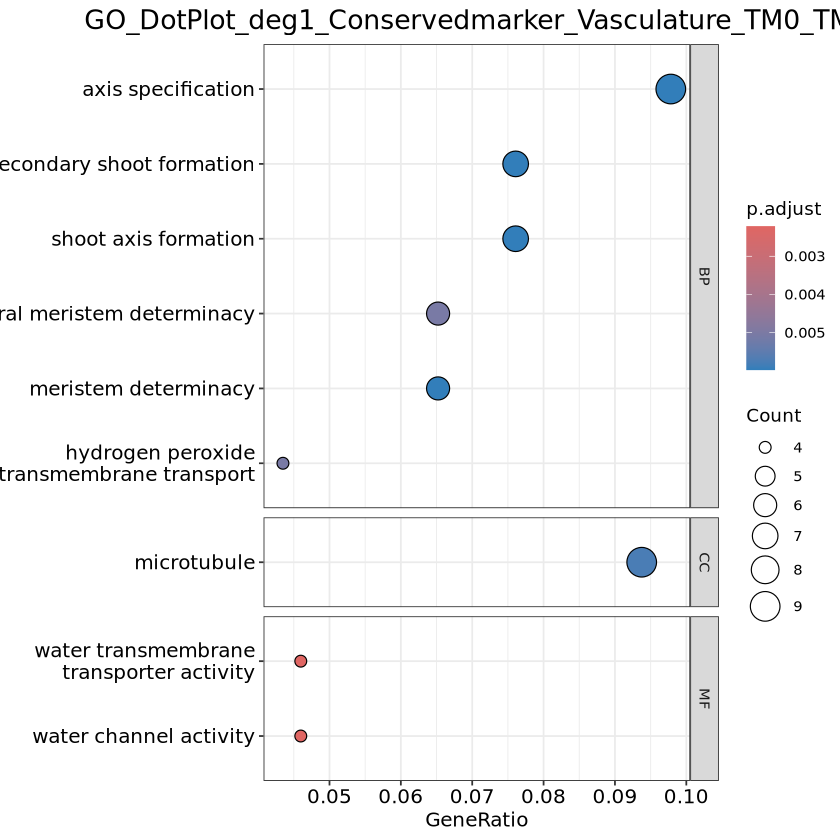

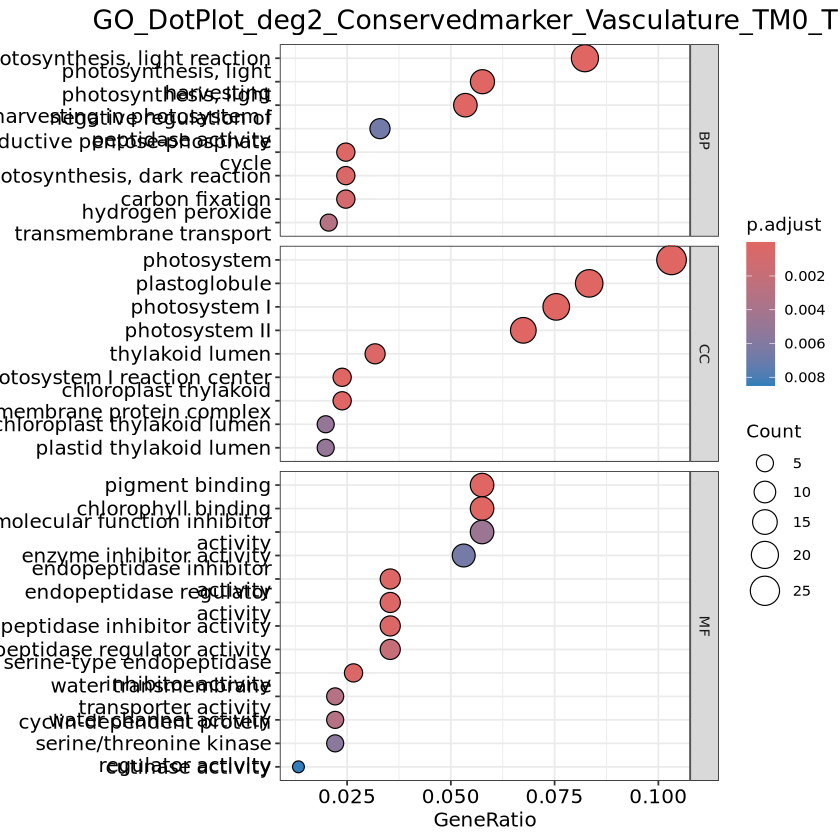

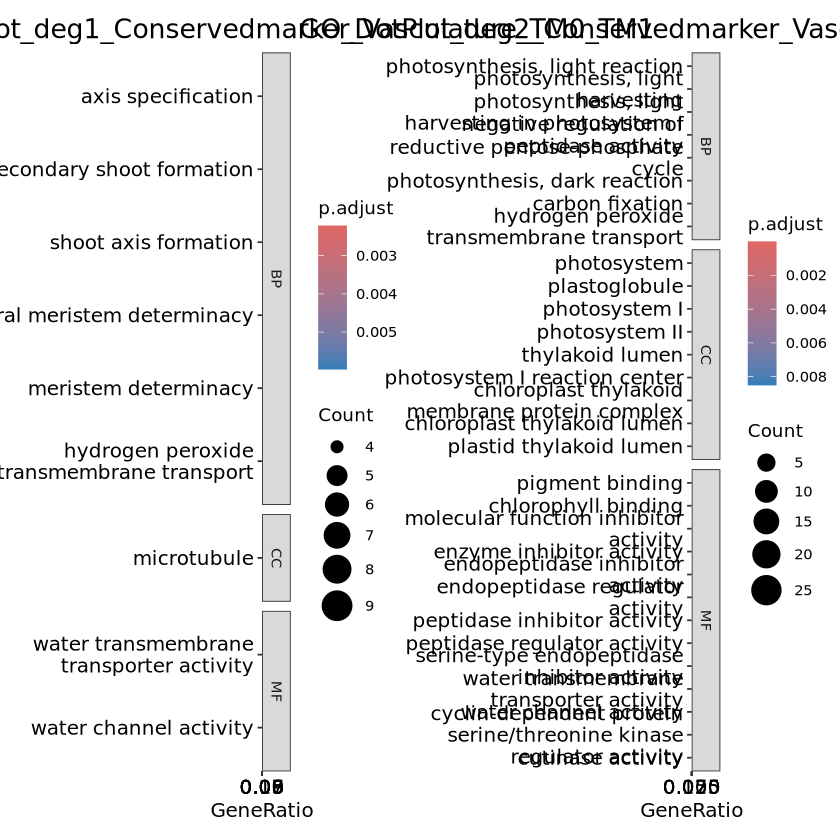

In [28]:
p1a <- dotplot(ego1, showCategory = 30, split = "ONTOLOGY") +
    facet_grid(ONTOLOGY ~ ., scale = "free", space = "free") +
    scale_colour_gradient(low = "red", high = "blue") +  # 颜色标度仅在此处添加
    labs(title = str_c("GO_DotPlot_", file_prefix1)) +
    base_theme
p1a
p1b <- dotplot(ego2, showCategory = 30, split = "ONTOLOGY") +
    facet_grid(ONTOLOGY ~ ., scale = "free", space = "free") +
    scale_colour_gradient(low = "red", high = "blue") +  # 颜色标度仅在此处添加
    labs(title = str_c("GO_DotPlot_", file_prefix2)) +
    base_theme
p1b
library(patchwork)
p1 <- p1a + p1b + plot_layout(ncol = 2)

### p2 cnetplot()
- 显示的是富集到的GO条目之间的关系，一种颜色代表一种GO条目，GO条目圆圈的大小代表基因数目，gray的点代表一种基因
- 通过`showCategory = 5`控制要显示的条目数目，重点突出条目之间，基因间的关系

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


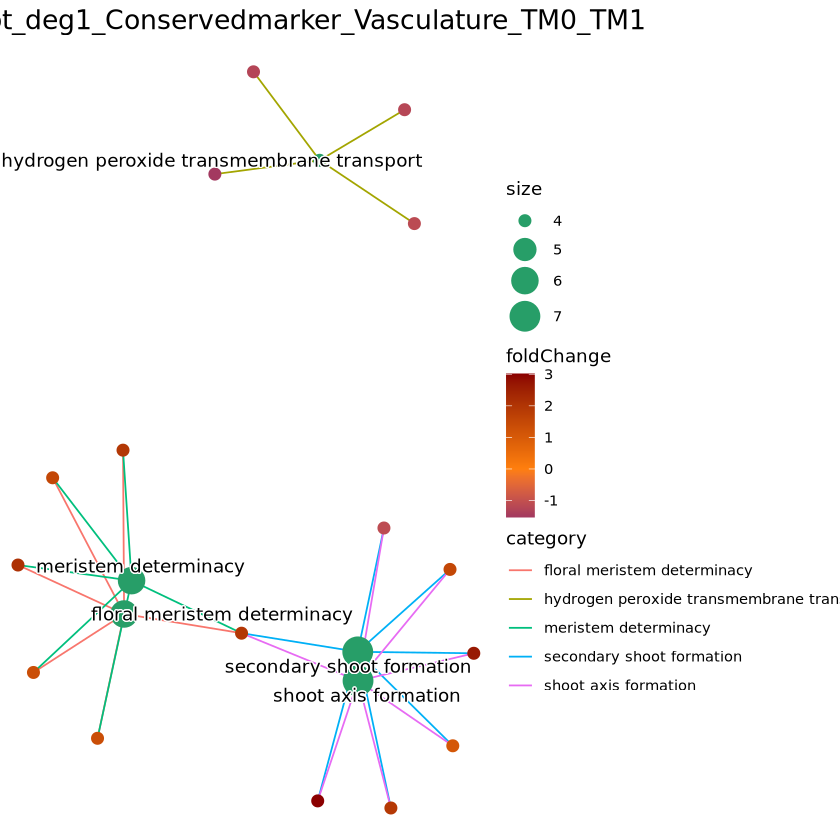

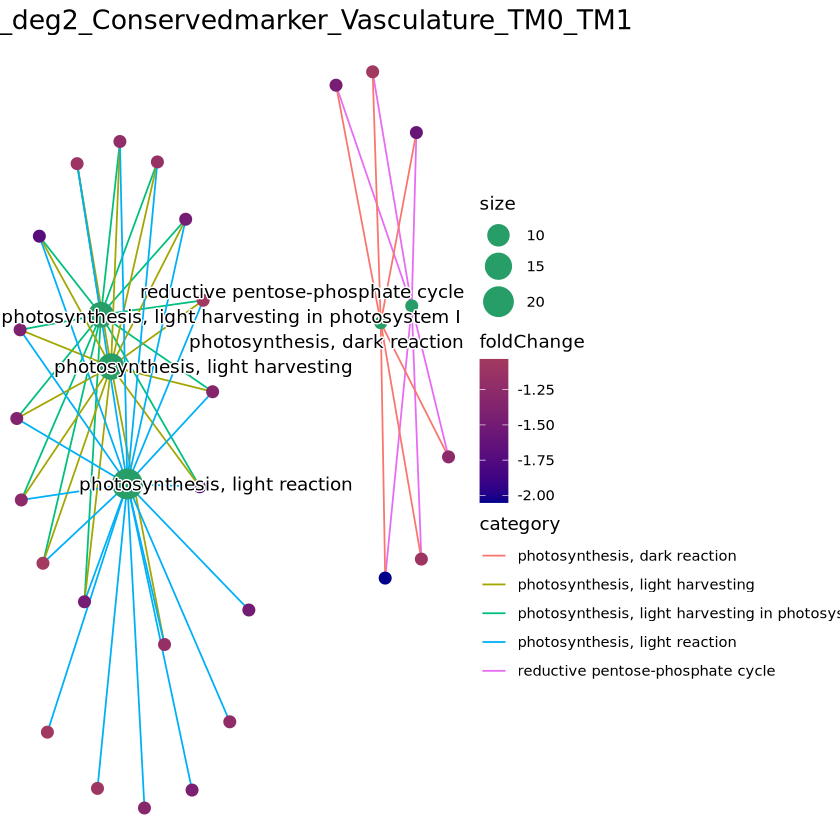

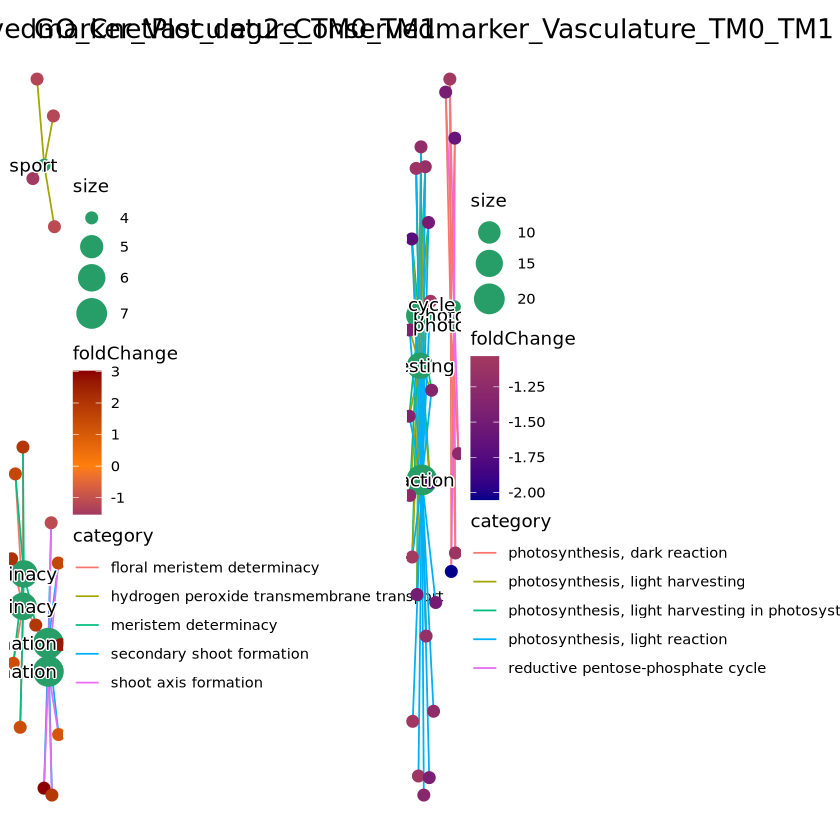

In [32]:
p2a <- cnetplot(
        ego1,
        foldChange = geneList1,
        showCategory = 5,
        node_label = "category",
        layout = 'kk',
        color_edge = "category",
        color_category = "#279e68",
        max.overlaps = Inf
    ) +
    labs(title = str_c("GO_CnetPlot_", file_prefix1)) +
    base_theme + 
    scale_color_gradient2(low='darkblue', mid = "#ff7f0e", high='darkred')
p2a

p2b <- cnetplot(
        ego2,
        foldChange = geneList2,
        showCategory = 5,
        node_label = "category",
        layout = 'kk',
        color_edge = "category",
        color_category = "#279e68",
        max.overlaps = Inf
    ) +
    labs(title = str_c("GO_CnetPlot_", file_prefix2)) +
    base_theme + 
    scale_color_gradient2(low='darkblue', mid = "#ff7f0e", high='darkred')
p2b
p2 <- p2a + p2b + plot_layout(ncol = 2)

### p3 cnetplot()
- `node_label = "all"`显示基因和GO的名字都显示
- `layout = 'fr'`区别于上面的kk，有什么意义呢

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


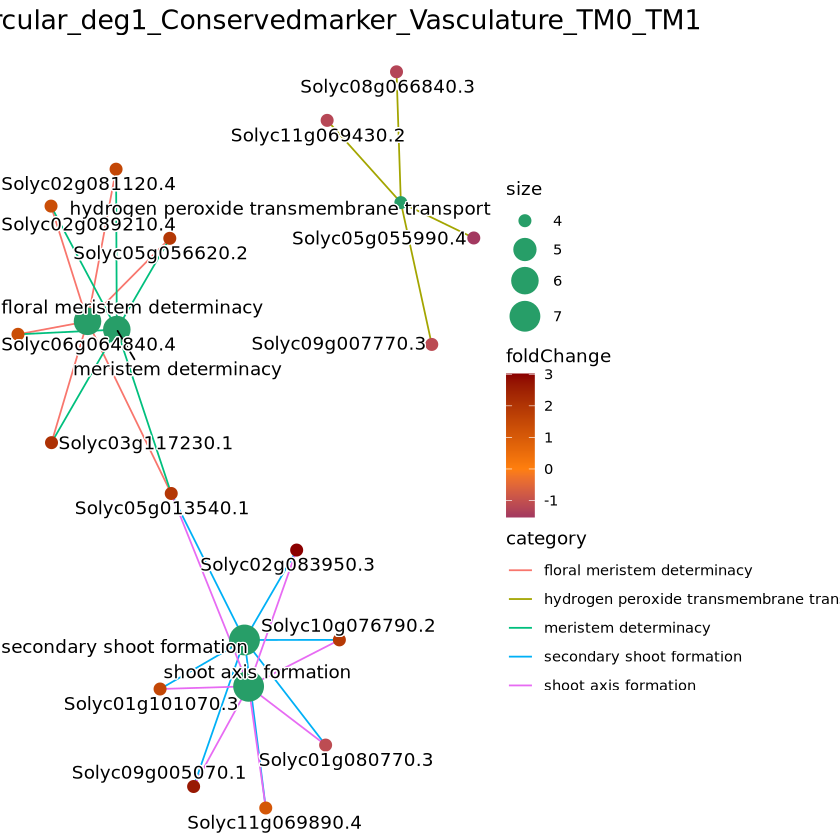

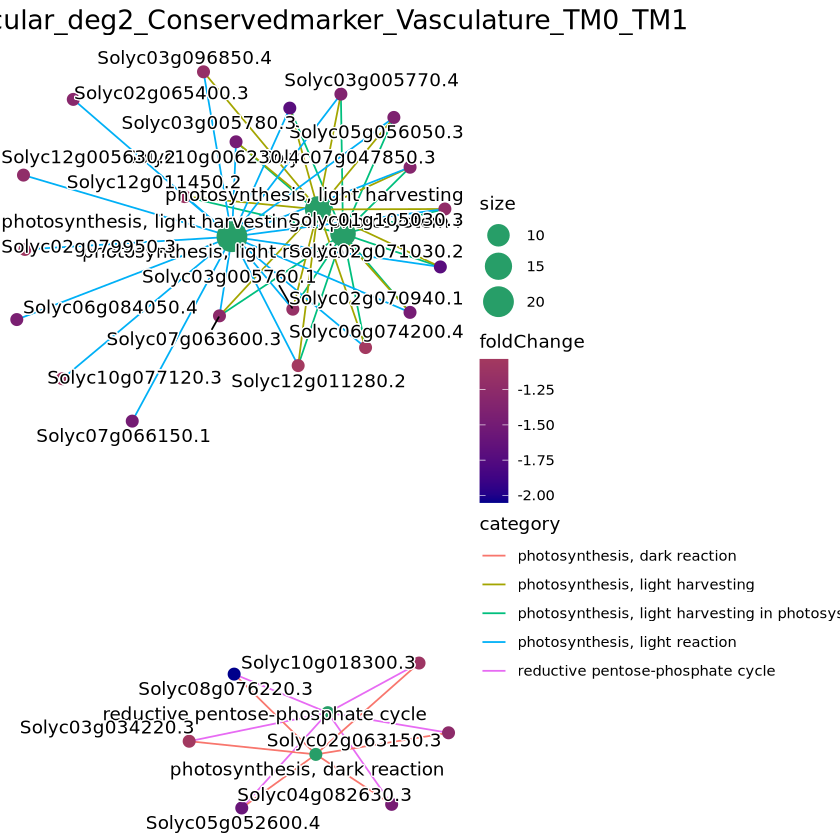

In [34]:
p3a <- cnetplot(
        ego1,
        foldChange = geneList1,
        showCategory = 5,
        layout = 'fr',
        node_label = "all",
        color_edge = "category",
        color_category = "#279e68",
        max.overlaps = Inf, 
        cex_label_gene = 0.4 
    ) +
    labs(title = str_c("GO_CnetPlot_circular_", file_prefix1)) +
    base_theme + 
    scale_color_gradient2(low='darkblue', mid = "#ff7f0e", high='darkred')
p3a

p3b <- cnetplot(
        ego2,
        foldChange = geneList2,
        showCategory = 5,
        layout = 'fr',
        node_label = "all",
        color_edge = "category",
        color_category = "#279e68",
        max.overlaps = Inf, 
        cex_label_gene = 0.4 
    ) +
    labs(title = str_c("GO_CnetPlot_circular_", file_prefix2)) +
    base_theme + 
    scale_color_gradient2(low='darkblue', mid = "#ff7f0e", high='darkred')
p3b

p3 <- p3a + p3b + plot_layout(ncol = 2)

### p4 upsetplot()
- 用于展示多个集合之间交集关系的可视化工具，通过矩阵和条形图的形式，清晰地展示集合之间的交集、并集和差集关系
- 在 UpSetPlot 中，条形图默认显示的是 交集（Intersection）的大小，而不是并集（Union）的大小

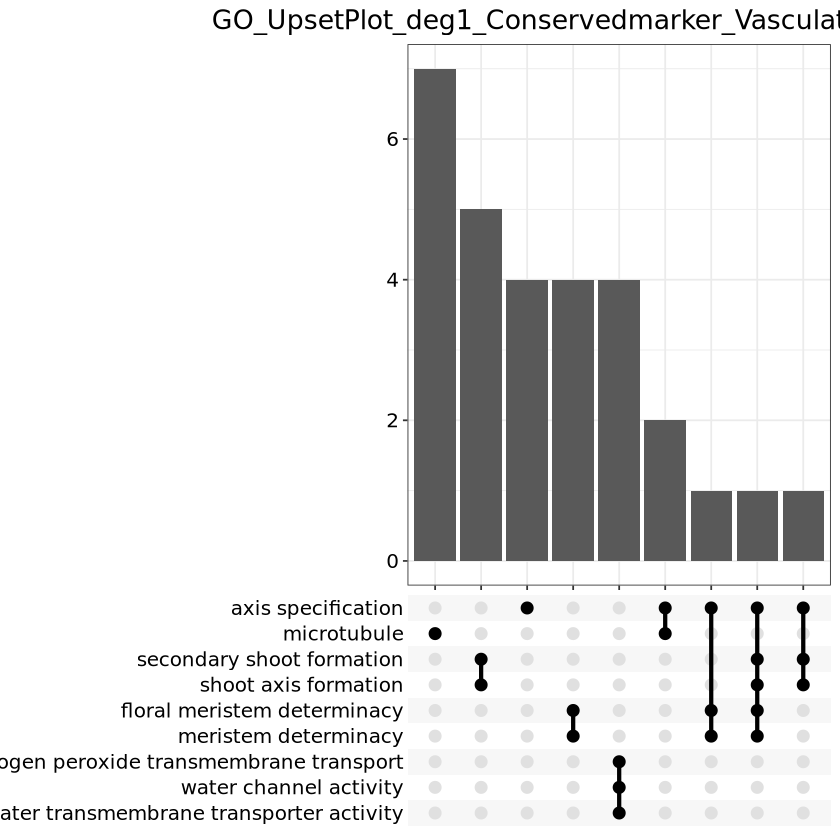

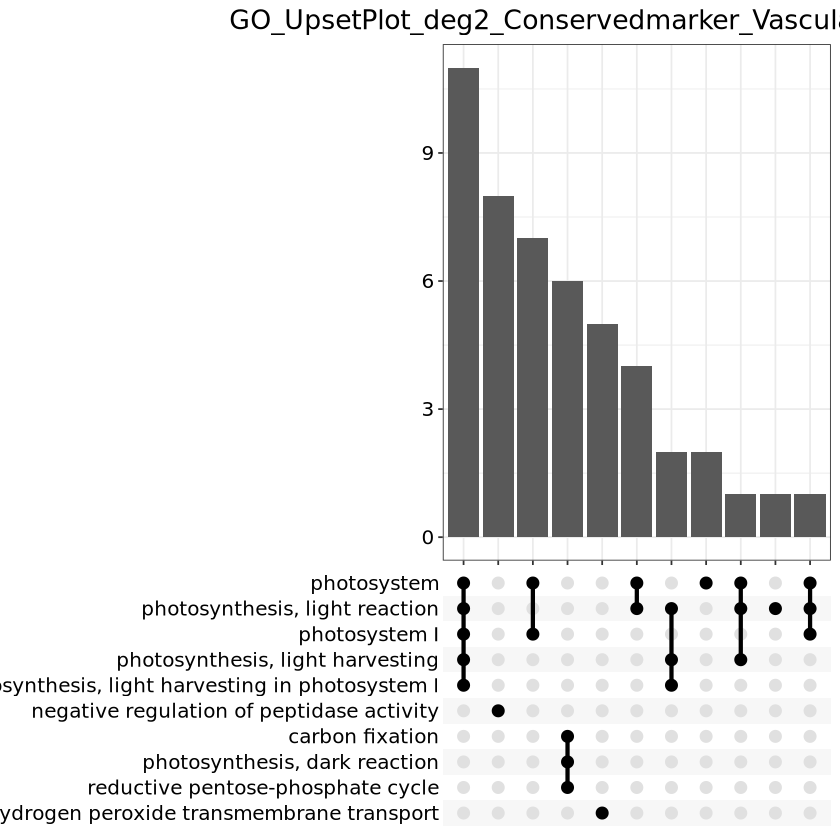

In [35]:
p4a <- upsetplot(ego1) +
    labs(title = str_c("GO_UpsetPlot_", file_prefix1)) +
    base_theme
p4a

p4b <- upsetplot(ego2) +
    labs(title = str_c("GO_UpsetPlot_", file_prefix2)) +
    base_theme
p4b

p4 <- p4a + p4b + plot_layout(ncol = 2)

### p5 heatplot()
- `foldChange` 参数用于将基因的表达变化倍数（Fold Change）映射到热图的颜色上
- 

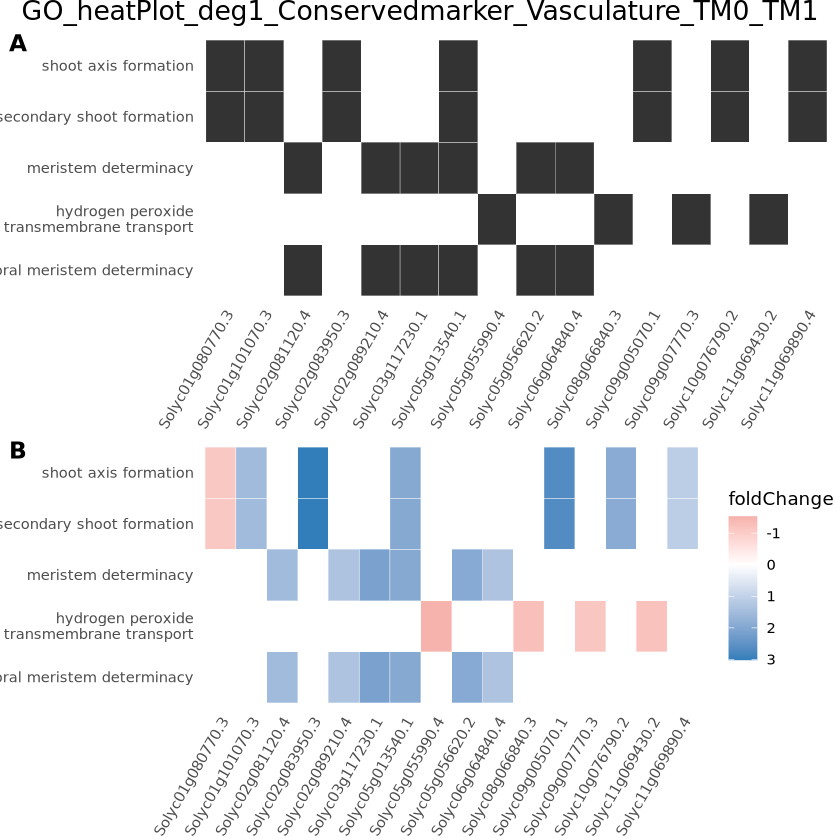

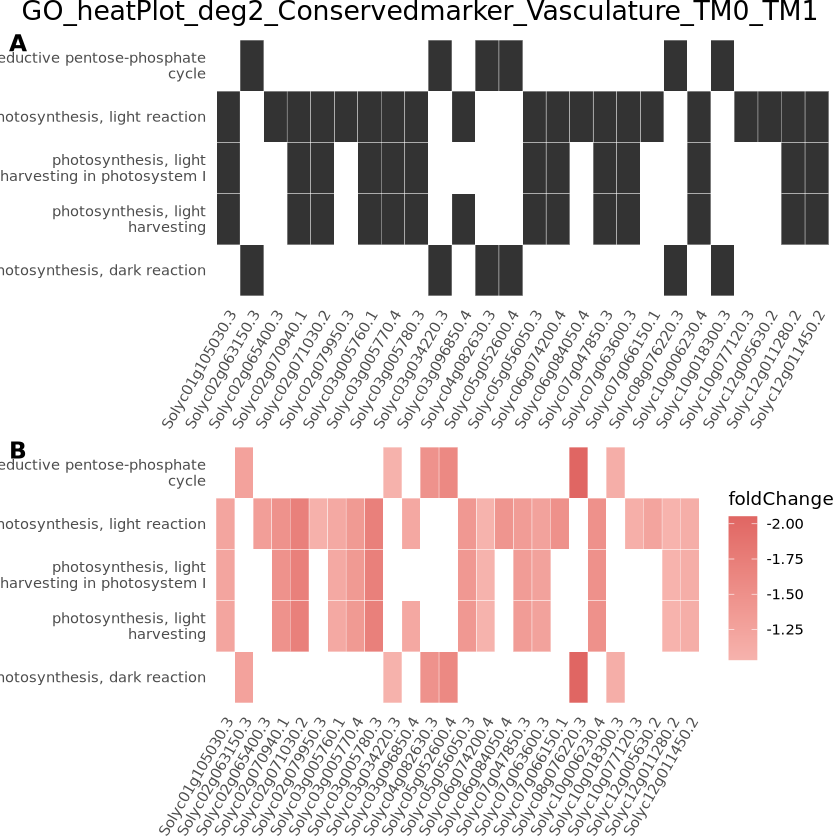

In [36]:
p5a_1 <- heatplot(ego1, showCategory=5)
p5a_2 <- heatplot(ego1, foldChange=geneList1, showCategory=5)
p5a <- cowplot::plot_grid(p5a_1, p5a_2, ncol=1, labels=LETTERS[1:2]) + ggtitle(str_c("GO_heatPlot_", file_prefix1)) + base_theme
p5a

p5b_1 <- heatplot(ego2, showCategory=5)
p5b_2 <- heatplot(ego2, foldChange=geneList2, showCategory=5)
p5b <- cowplot::plot_grid(p5b_1, p5b_2, ncol=1, labels=LETTERS[1:2]) + ggtitle(str_c("GO_heatPlot_", file_prefix2)) + base_theme
p5b

p5 <- p5a + p5b + plot_layout(ncol = 2)

`pairwise_termsim()` 用于计算富集分析结果中各个通路之间的相似性矩阵，并将其添加到富集结果对象的 termsim 属性中

In [37]:
ego1p <- pairwise_termsim(ego1)
ego2p <- pairwise_termsim(ego2)

### p6 treeplot()
- 一个枝代表一个通路，枝点的圆圈大小代表富集基因的数目，枝点的颜色代表可信度即p.adjust
- 树关系依据于`pairwise_termsim()`的计算，枝之间越近代表相似性越高

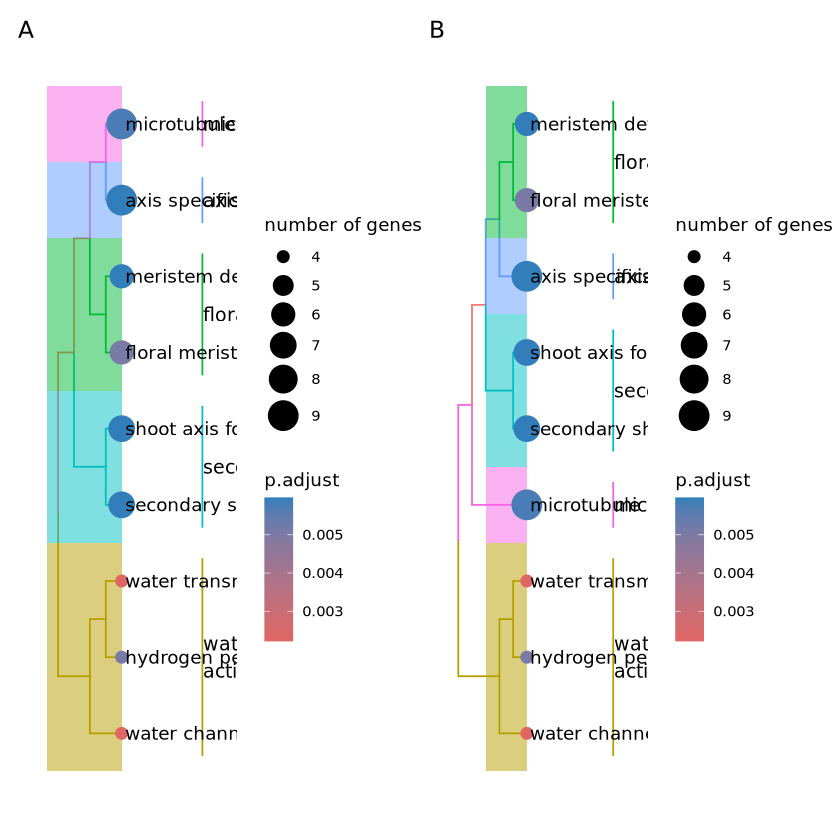

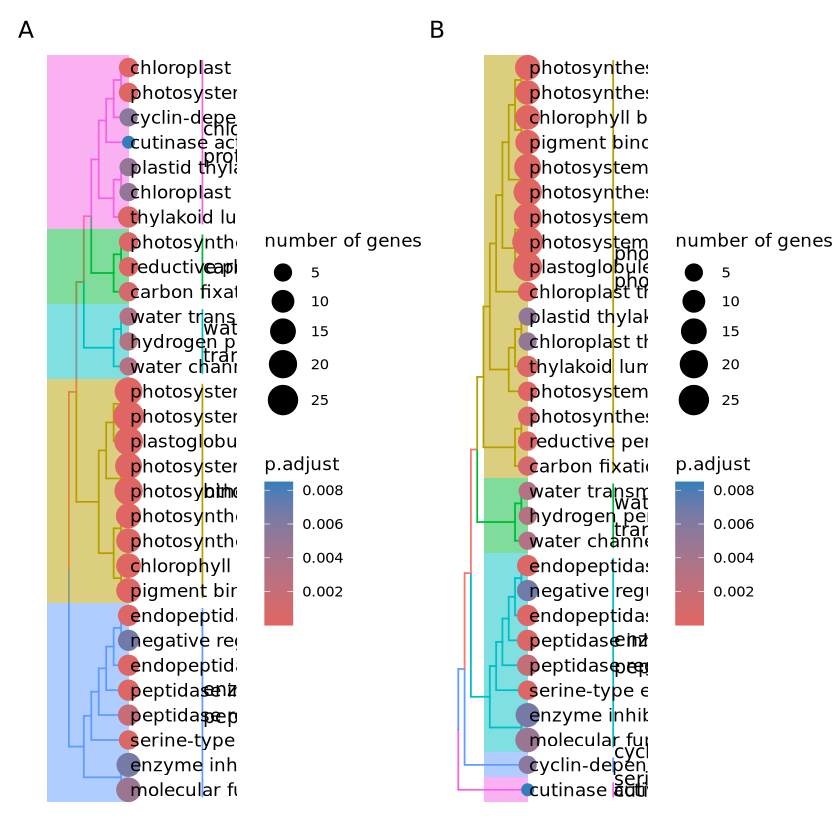

In [38]:
p6a_1 <- treeplot(ego1p)
p6a_2 <- treeplot(ego1p, cluster.params = list(method = "average"))
p6a <- aplot::plot_list(p6a_1, p6a_2, tag_levels='A')
p6a

p6b_1 <- treeplot(ego2p)
p6b_2 <- treeplot(ego2p, cluster.params = list(method = "average"))
p6b <- aplot::plot_list(p6b_1, p6b_2, tag_levels='A')
p6b

p6 <- p6a + p6b + plot_layout(ncol = 2)

### p7 emapplot()
- 绘制富集分析的通路相似性图
- 圆圈大小，圆圈颜色，连线代表通路关系，聚集的通路在一起


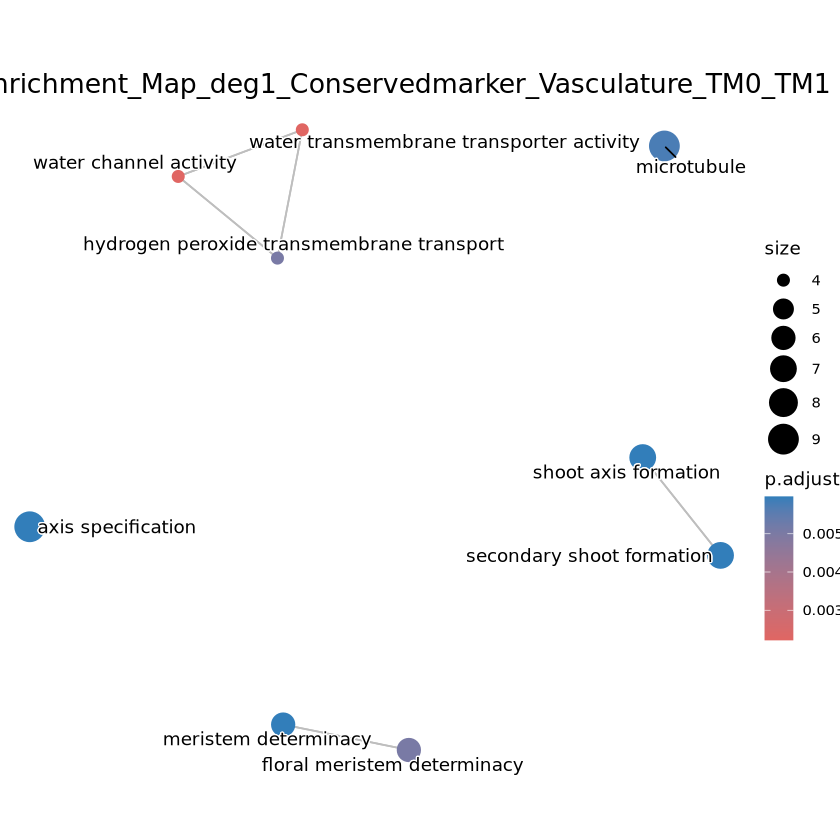

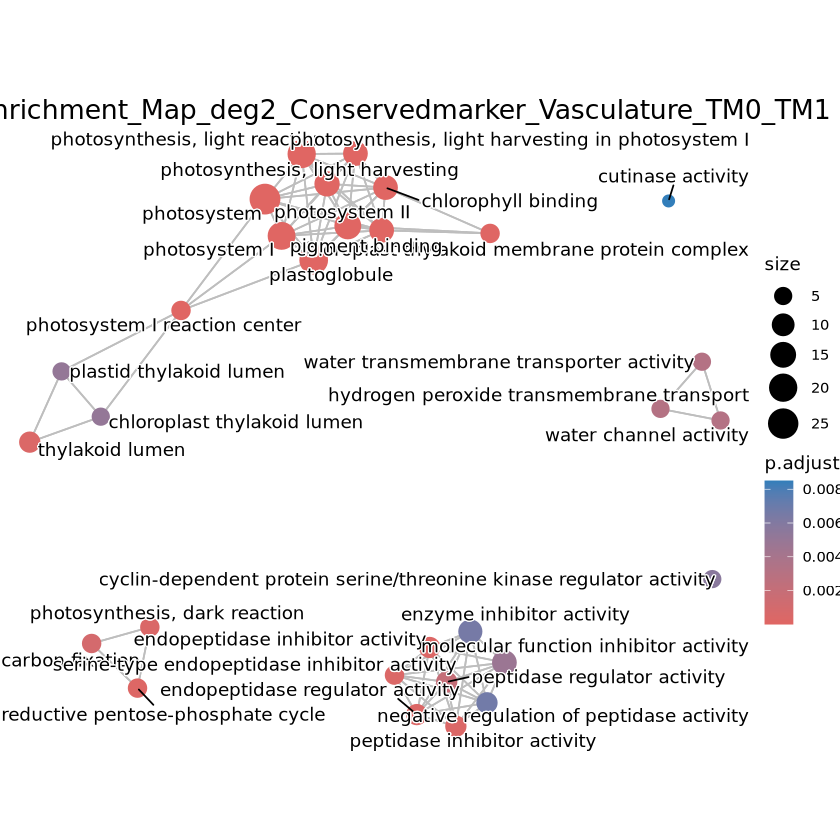

In [39]:
p7a <- emapplot(ego1p, layout = 'fr') + ggtitle(str_c("GO_Enrichment_Map_", file_prefix1)) + base_theme
p7a

p7b <- emapplot(ego2p, layout = 'fr') + ggtitle(str_c("GO_Enrichment_Map_", file_prefix2)) + base_theme
p7b

p7 <- p7a + p7b + plot_layout(ncol = 2)

In [40]:
ego1_BP <- enrichGO(
    gene = gene1,
    OrgDb = Tomato,
    keyType = 'GID',
    ont = 'BP',
    qvalueCutoff = 0.05,
    pvalueCutoff = 0.05
)

ego2_BP <- enrichGO(
    gene = gene2,
    OrgDb = Tomato,
    keyType = 'GID',
    ont = 'BP',
    qvalueCutoff = 0.05,
    pvalueCutoff = 0.05
)

### p8 goplot()
- 可视化 GO 富集分析结果,生成一个气泡图，展示富集分析中显著的 GO 术语
- 展示相互关系relationship: `isa`,`negatively regulate`,`part of`,`regulates`

Warning message:
"ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


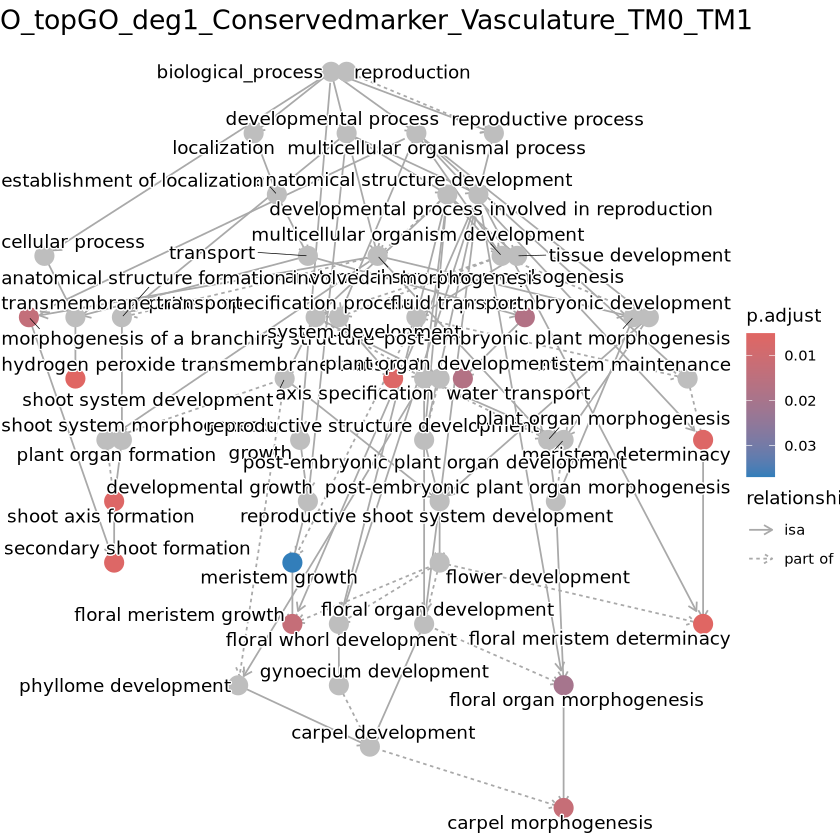

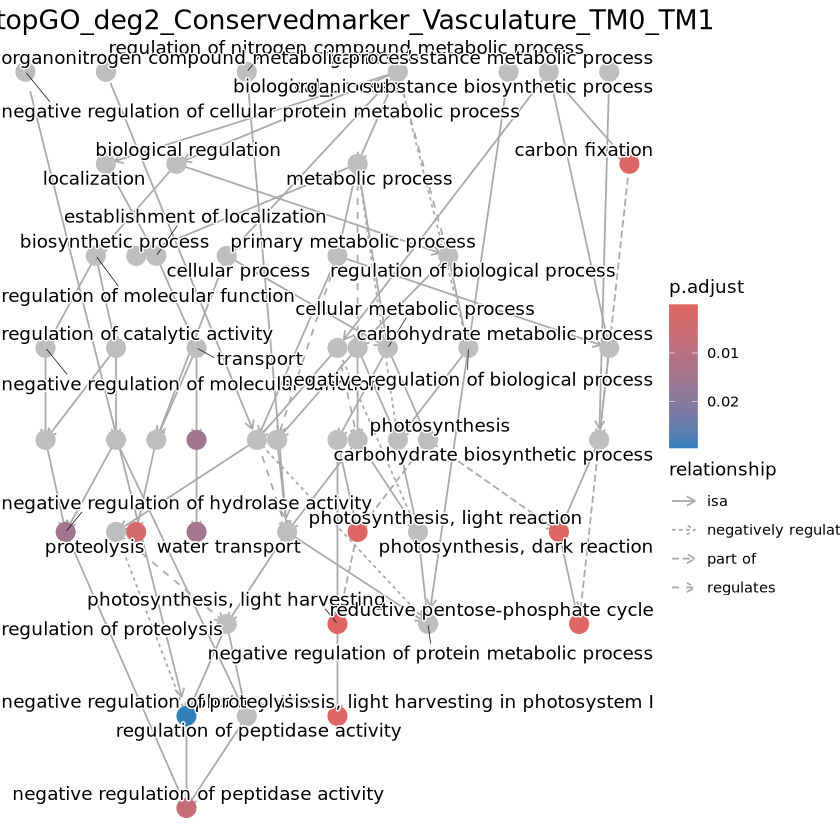

In [42]:
p8a <- goplot(ego1_BP, showCategory = 10) + ggtitle(str_c("GO_topGO_", file_prefix1)) + base_theme 
p8a

p8b <- goplot(ego2_BP, showCategory = 10) + ggtitle(str_c("GO_topGO_", file_prefix2)) + base_theme 
p8b

p8 <- p8a + p8b + plot_layout(ncol = 2)

## KEGG analysis

In [43]:
kk1 <- enricher(gene1,TERM2GENE = kegg2gene,TERM2NAME = kegg2name,pvalueCutoff = 0.05,qvalueCutoff = 0.05)
kk_df1 <- as.data.frame(kk1)
write.csv(kk_df1, str_c(folder_target, file_prefix1, "_df_kegg.csv"), row.names = FALSE)

kk2 <- enricher(gene2,TERM2GENE = kegg2gene,TERM2NAME = kegg2name,pvalueCutoff = 0.05,qvalueCutoff = 0.05)
kk_df2 <- as.data.frame(kk2)
write.csv(kk_df2, str_c(folder_target, file_prefix2, "_df_kegg.csv"), row.names = FALSE)

In [54]:
if (nrow(kk1)==0){
    print('kk1 nrow == 0')
    blank_plot <- ggplot() +
    theme_void() +
    labs(title = "No Data Available")
    p9a <- blank_plot
    p10a <- blank_plot
    p11a <- blank_plot
    p12a <- blank_plot
    p13a <- blank_plot
    p14a <- blank_plot
    p15a <- blank_plot
} else {
    p9a <- dotplot(kk1, showCategory = 30) + 
        labs(title = str_c("KEGG_DotPlot_", file_prefix1)) + 
        base_theme
    p9a
    
    p10a <- cnetplot(
        kk1,
        foldChange = geneList1,
        showCategory = 5,
        node_label = "category",
        layout = 'kk',
        color_edge = "category",
        color_category = "#279e68",
        max.overlaps = Inf
    ) +
    labs(title = str_c("KEGG_CnetPlot_", file_prefix1)) +
    base_theme + 
    scale_color_gradient2(low='darkblue', mid = "#ff7f0e", high='darkred')
    p10a
    
    p11a <- cnetplot(
        kk1,
        foldChange = geneList1,
        showCategory = 5,
        node_label = "all",
        layout = 'fr',
        color_category = "#279e68",
        color_edge = "category",
        max.overlaps = Inf,
        cex_label_gene = 0.6  
    ) +
    labs(title = str_c("KEGG_CnetPlot_circular_", file_prefix1)) +
    base_theme + 
    scale_color_gradient2(low='darkblue', mid = "#ff7f0e", high='darkred')
    p11a
    
    p12a <- upsetplot(kk1) +
        labs(title = str_c("KEGG_UpsetPlot_", file_prefix1)) +
        base_theme
    p12a
    
    p13a_1 <- heatplot(kk1, showCategory=5)
    p13a_2 <- heatplot(kk1, foldChange=geneList1, showCategory=5)
    p13a <- cowplot::plot_grid(p13a_1, p13a_2, ncol=1, labels=LETTERS[1:2]) + ggtitle(str_c("KEGG_heatPlot_", file_prefix1)) + base_theme
    p13a
    
    kk1p <- pairwise_termsim(kk1)
    p14a_1 <- treeplot(kk1p)
    p14a_2 <- treeplot(kk1p, cluster.params = list(method = "average"))
    p14a <- aplot::plot_list(p14a_1, p14a_2, tag_levels='A')
    p14a
    
    p15a <- emapplot(kk1p, layout = 'fr') + ggtitle(str_c("KEGG_Enrichment_Map_", file_prefix1)) + base_theme
    p15a    
}
    

[1] "kk1 nrow == 0"


### p9 dotplot()
- 富集到该KEGG通路的基因占总输入基因的多少，count和p.adjust

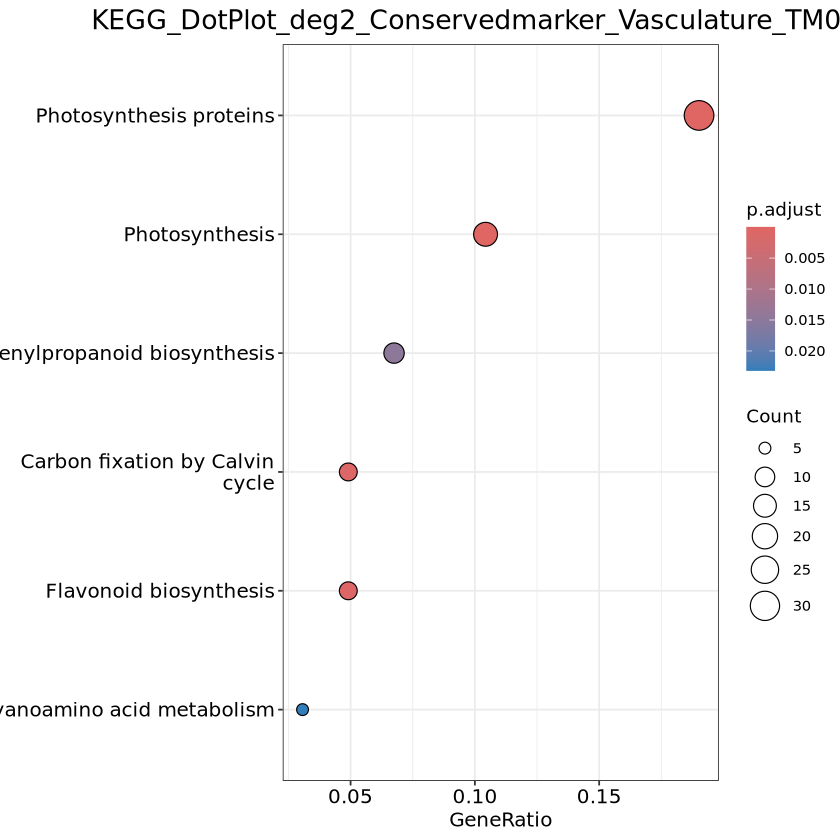

In [56]:
p9b <- dotplot(kk2,showCategory = 30) +
    labs(title = str_c("KEGG_DotPlot_", file_prefix2)) + 
    base_theme
p9b

p9 <- p9a + p9b + plot_layout(ncol = 2)

### p10 cnetplot()
- 面向KEGG的通路关系图

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


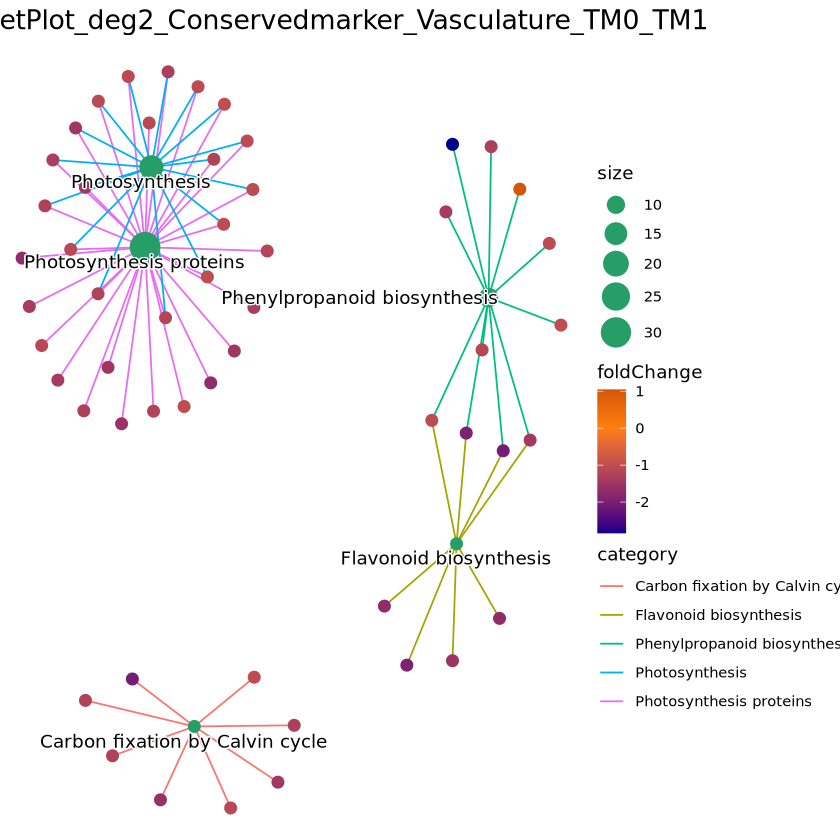

In [57]:
p10b <- cnetplot(
        kk2,
        foldChange = geneList2,
        showCategory = 5,
        node_label = "category",
        layout = 'kk',
        color_edge = "category",
        color_category = "#279e68",
        max.overlaps = Inf
    ) +
    labs(title = str_c("KEGG_CnetPlot_", file_prefix2)) +
    base_theme + 
    scale_color_gradient2(low='darkblue', mid = "#ff7f0e", high='darkred')
p10b

p10 <- p10a + p10b + plot_layout(ncol = 2)

### p11 cnetplot()
- 面向KEGG的通路关系图，多一些注释

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


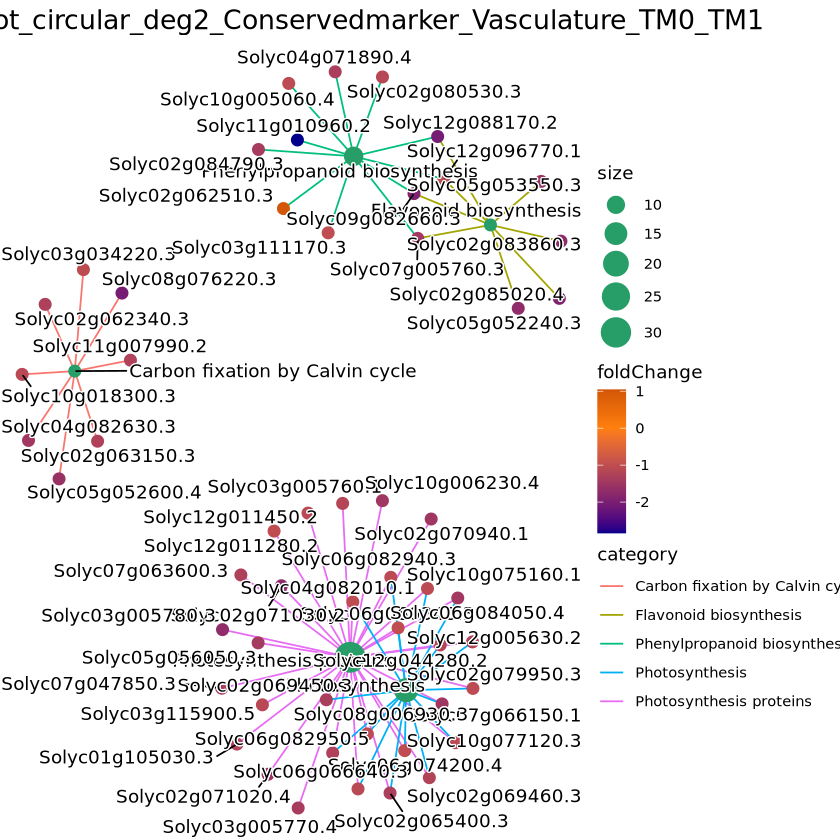

In [58]:
p11b <- cnetplot(
        kk2,
        foldChange = geneList2,
        showCategory = 5,
        node_label = "all",
        layout = 'fr',
        color_category = "#279e68",
        color_edge = "category",
        max.overlaps = Inf,
        cex_label_gene = 0.6  
    ) +
    labs(title = str_c("KEGG_CnetPlot_circular_", file_prefix2)) +
    base_theme + 
    scale_color_gradient2(low='darkblue', mid = "#ff7f0e", high='darkred')
p11b

p11 <- p11a + p11b + plot_layout(ncol = 2)

# p12 upsetplot(kk)

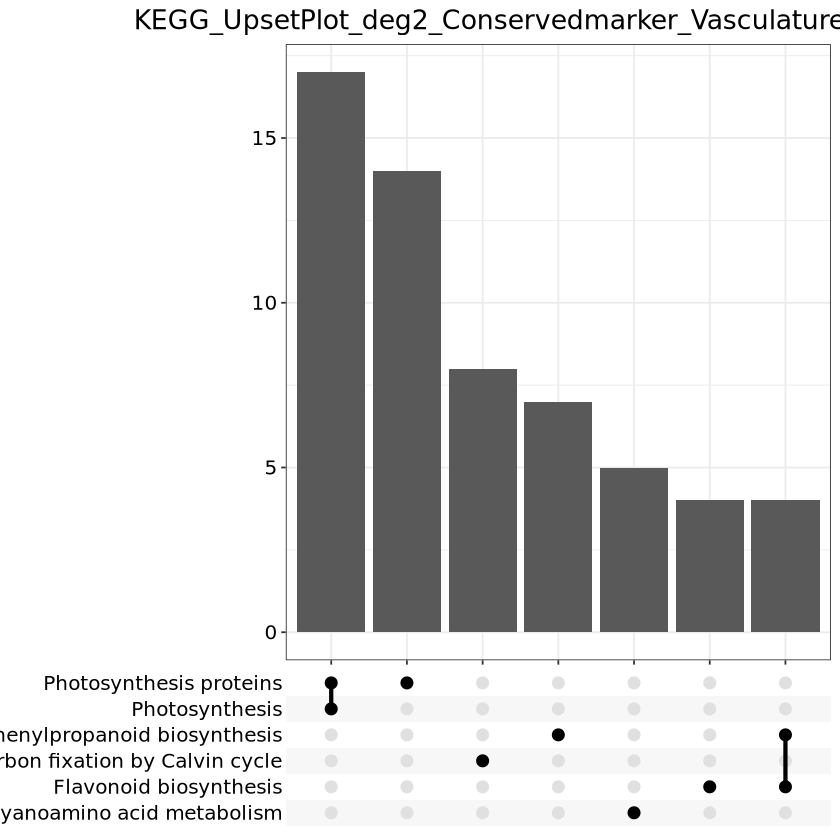

In [59]:
p12b <- upsetplot(kk2) +
    labs(title = str_c("KEGG_UpsetPlot_", file_prefix2)) +
    base_theme
p12b

p12 <- p12a + p12b + plot_layout(ncol = 2)

### p13 heatplot(kk)

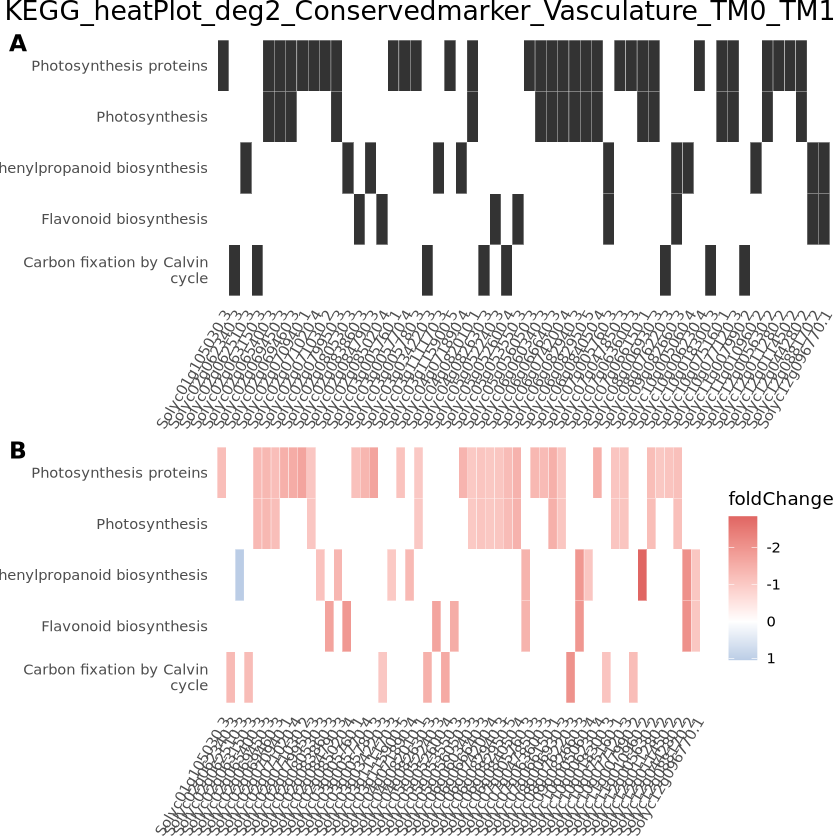

In [60]:
p13b_1 <- heatplot(kk2, showCategory=5)
p13b_2 <- heatplot(kk2, foldChange=geneList2, showCategory=5)
p13b <- cowplot::plot_grid(p13b_1, p13b_2, ncol=1, labels=LETTERS[1:2]) + ggtitle(str_c("KEGG_heatPlot_", file_prefix2)) + base_theme
p13b

p13 <- p13a + p13b + plot_layout(ncol = 2)

### p14 treeplot(kk2)

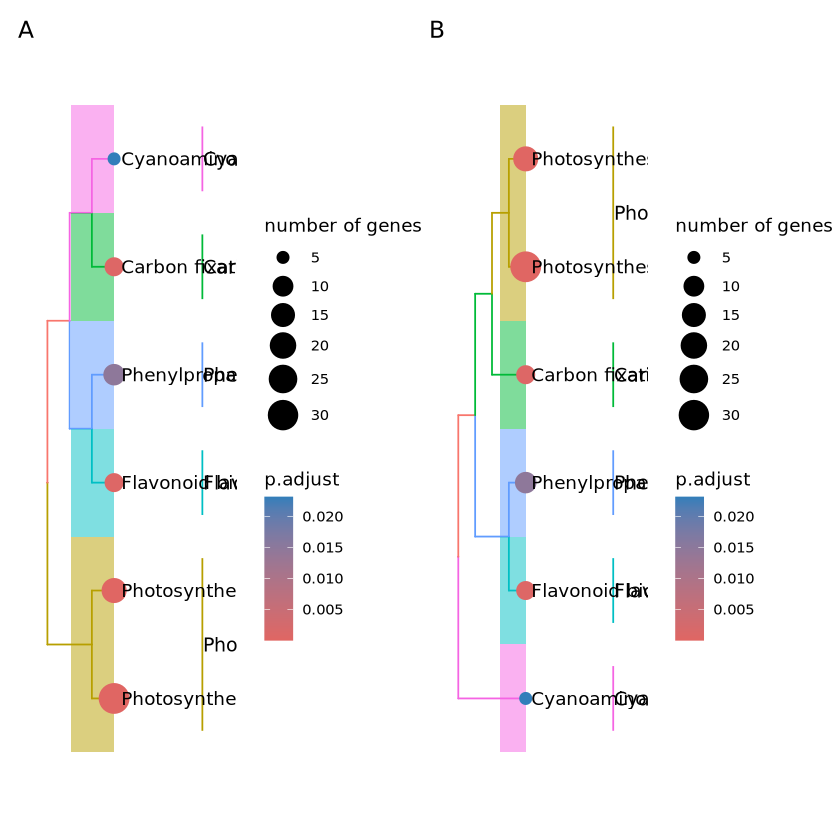

In [61]:
kk2p <- pairwise_termsim(kk2)

p14b_1 <- treeplot(kk2p)
p14b_2 <- treeplot(kk2p, cluster.params = list(method = "average"))
p14b <- aplot::plot_list(p14b_1, p14b_2, tag_levels='A')
p14b

p14 <- p14a + p14b + plot_layout(ncol = 2)

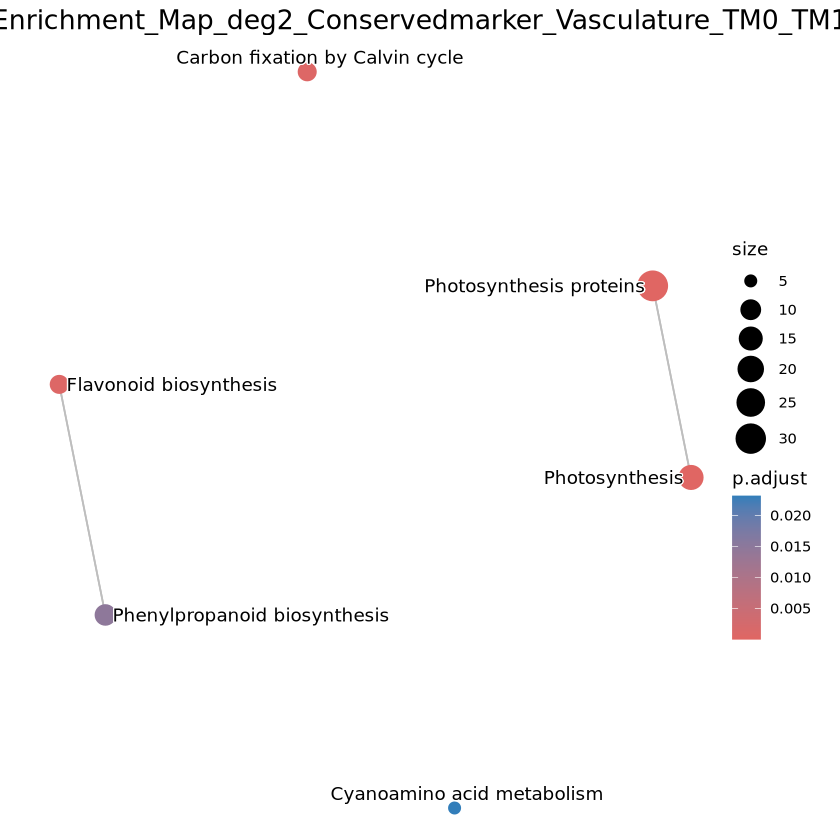

In [62]:
p15b <- emapplot(kk2p, layout = 'fr') + ggtitle(str_c("KEGG_Enrichment_Map_", file_prefix2)) + base_theme
p15b

p15 <- p15a + p15b + plot_layout(ncol = 2)

In [39]:
pdf(str_c(folder_target, file_prefix, "_GO_dotplot.pdf"), height = 30, width = 8)
print(p1)
dev.off()

pdf(str_c(folder_target, file_prefix, "_KEGG_dotplot.pdf"), height = 10, width = 8)
print(p9)
dev.off()

pdf(str_c(folder_target, file_prefix, "_cnet.pdf"), height = 15, width = 18)
print(p2)
print(p3)
print(p4)
print(p7)
print(p10)
print(p11)
print(p12)
print(p15)
dev.off() 
    
pdf(str_c(folder_target, file_prefix, "_heatplot.pdf"), height = 15, width = 30)
print(p5)
print(p6)
print(p8)
wordcloud(words = ego_BP$Description, freq = ego_BP$Count, scale=(c(3, .1)), colors=brewer.pal(8, "Dark2"), max.words = 25)
print(p13)
print(p14)
wordcloud(words = kk$Description, freq = kk$Count, scale=(c(3, .1)), colors=brewer.pal(8, "Dark2"), max.words = 25)
dev.off() 

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


In [63]:
dir = '/data/work/output/FGSEA/'
file1 = file_target_deg1
file2 = file_target_deg2

dir.create(dir, recursive = TRUE, showWarnings = FALSE)

pathwayLines_go <- strsplit(readLines(gmt_go), "\t")
TomatoGOPathways <- lapply(pathwayLines_go, tail, -2)
names(TomatoGOPathways) <- sapply(pathwayLines_go, head, 1)

pathwayLines_kegg <- strsplit(readLines(gmt_kegg), "\t")
TomatoKEGGPathways <- lapply(pathwayLines_kegg, tail, -2)
names(TomatoKEGGPathways) <- sapply(pathwayLines_kegg, head, 1)

In [64]:
data1 <- read.csv(file1, row.names = 1) 
deg1 <- rownames_to_column(data1, var = "Gene") %>%
    filter(!is.na(Gene) & !duplicated(Gene))
head(deg1)
TomatoGORanks1 <- deg1[[log2fc_1]]
names(TomatoGORanks1) <- deg1$Gene 
TomatoGORanks1 <- sort(TomatoGORanks1, decreasing = F) 

data2 <- read.csv(file2, row.names = 1) 
deg2 <- rownames_to_column(data2, var = "Gene") %>%
    filter(!is.na(Gene) & !duplicated(Gene))
head(deg2)
TomatoGORanks2 <- deg2[[log2fc_2]]
names(TomatoGORanks2) <- deg2$Gene 
TomatoGORanks2 <- sort(TomatoGORanks2, decreasing = F)

Gene             TM1_p_val     TM1_avg_log2FC TM1_pct.1 TM1_pct.2
1 MT-rrn26         1.183961e-237 2.023743       0.756     0.576    
2 Solyc12g056290.2 6.746384e-274 2.751336       0.487     0.187    
3 Solyc00g500164.1 9.578979e-158 1.801340       0.633     0.438    
4 Solyc00g160750.1 1.060475e-152 2.217754       0.418     0.195    
5 Solyc10g048060.2  3.172158e-92 1.919658       0.271     0.109    
6 Solyc11g051176.1  2.443937e-87 1.407254       0.606     0.442    
  TM1_p_val_adj TM0_p_val     TM0_avg_log2FC TM0_pct.1 TM0_pct.2 TM0_p_val_adj
1 3.384588e-233  0.000000e+00 2.378843       0.712     0.367      0.000000e+00
2 1.928589e-269 1.329808e-110 3.116408       0.256     0.073     3.801523e-106
3 2.738343e-153  8.739389e-84 2.448973       0.250     0.097      2.498329e-79
4 3.031581e-148  3.638643e-35 2.125433       0.108     0.047      1.040179e-30
5  9.068249e-88  1.311619e-33 1.597309       0.101     0.048      3.749525e-29
6  6.986482e-83  2.720632e-23 1.124392       0.257     0.182      7.777469e-19
  max_pval      minimump_p_val
1 1.183961e-237  0.000000e+00 
2 1.329808e-110 1.349277e-273 
3  8.739389e-84 1.915796e-157 
4  3.638643e-35 2.120951e-152 
5  1.311619e-33  6.344316e-92 
6  2.720632e-23  4.887874e-87

Gene             TM1_p_val     TM1_avg_log2FC TM1_pct.1 TM1_pct.2
1 MT-rrn26         1.183961e-237  2.023743      0.756     0.576    
2 Solyc12g056290.2 6.746384e-274  2.751336      0.487     0.187    
3 Solyc00g500164.1 9.578979e-158  1.801340      0.633     0.438    
4 Solyc00g160750.1 1.060475e-152  2.217754      0.418     0.195    
5 Solyc07g007755.2 5.234449e-117 -1.423717      0.424     0.656    
6 Solyc06g074820.3 1.171698e-103 -1.179514      0.681     0.804    
  TM1_p_val_adj TM0_p_val     TM0_avg_log2FC TM0_pct.1 TM0_pct.2 TM0_p_val_adj
1 3.384588e-233  0.000000e+00  2.3788432     0.712     0.367      0.000000e+00
2 1.928589e-269 1.329808e-110  3.1164080     0.256     0.073     3.801523e-106
3 2.738343e-153  8.739389e-84  2.4489730     0.250     0.097      2.498329e-79
4 3.031581e-148  3.638643e-35  2.1254329     0.108     0.047      1.040179e-30
5 1.496372e-112  2.075218e-84 -0.8138965     0.424     0.661      5.932427e-80
6  3.349533e-99  3.886129e-89 -0.7733216     0.550     0.763      1.110928e-84
  max_pval      minimump_p_val
1 1.183961e-237  0.000000e+00 
2 1.329808e-110 1.349277e-273 
3  8.739389e-84 1.915796e-157 
4  3.638643e-35 2.120951e-152 
5  2.075218e-84 1.046890e-116 
6  3.886129e-89 2.343396e-103

In [65]:
fgseaRes1 <- fgsea(pathways = TomatoGOPathways, 
                  stats = TomatoGORanks1,
                  eps = 0.0,
                  minSize = 15,
                  maxSize = 500)
head(fgseaRes1)

fgseaRes2 <- fgsea(pathways = TomatoGOPathways, 
                  stats = TomatoGORanks2,
                  eps = 0.0,
                  minSize = 15,
                  maxSize = 500)
head(fgseaRes2)

pathway                                   pval         padj         log2err  
1 DNA-binding transcription factor activity 1.074610e-05 3.516907e-05 0.5933255
2 DNA-templated transcription               1.614581e-06 1.075685e-05 0.6435518
3 RNA biosynthetic process                  2.091610e-06 1.075685e-05 0.6272567
4 RNA metabolic process                     7.651086e-07 6.120869e-06 0.6594444
5 anatomical structure development          6.618962e-02 9.164717e-02 0.2343926
6 aromatic compound biosynthetic process    2.309648e-05 6.395947e-05 0.5756103
  ES        NES      size leadingEdge 
1 0.6385494 2.648223 18   Solyc02g....
2 0.6771654 2.808373 18   Solyc02g....
3 0.6875000 2.805242 17   Solyc02g....
4 0.6929134 2.873684 18   Solyc02g....
5 0.3360039 1.526907 23   Solyc02g....
6 0.6212070 2.576300 18   Solyc02g....

pathway                                   pval         padj        
1 ATP binding                               4.756278e-01 6.392437e-01
2 DNA binding                               3.314709e-05 2.189052e-04
3 DNA-binding transcription factor activity 5.219675e-06 4.175740e-05
4 DNA-templated transcription               1.714823e-07 4.004723e-06
5 Golgi apparatus                           3.382749e-01 5.119837e-01
6 RNA biosynthetic process                  1.714823e-07 4.004723e-06
  log2err    ES         NES        size leadingEdge 
1 0.06628422 -0.2591980 -0.9785843 15   Solyc01g....
2 0.55733224  0.5264838  2.6109823 19   Solyc02g....
3 0.61052688  0.5768834  2.8861798 20   Solyc02g....
4 0.69013246  0.6458714  3.2030592 19   Solyc02g....
5 0.07892096 -0.2384044 -1.0934538 26   Solyc07g....
6 0.69013246  0.6458714  3.2030592 19   Solyc02g....

### p1 plotEnrichment()
- 横轴的竖线应该代表富集到的通路，拐点对应一个竖线，富集分数代表什么呢？

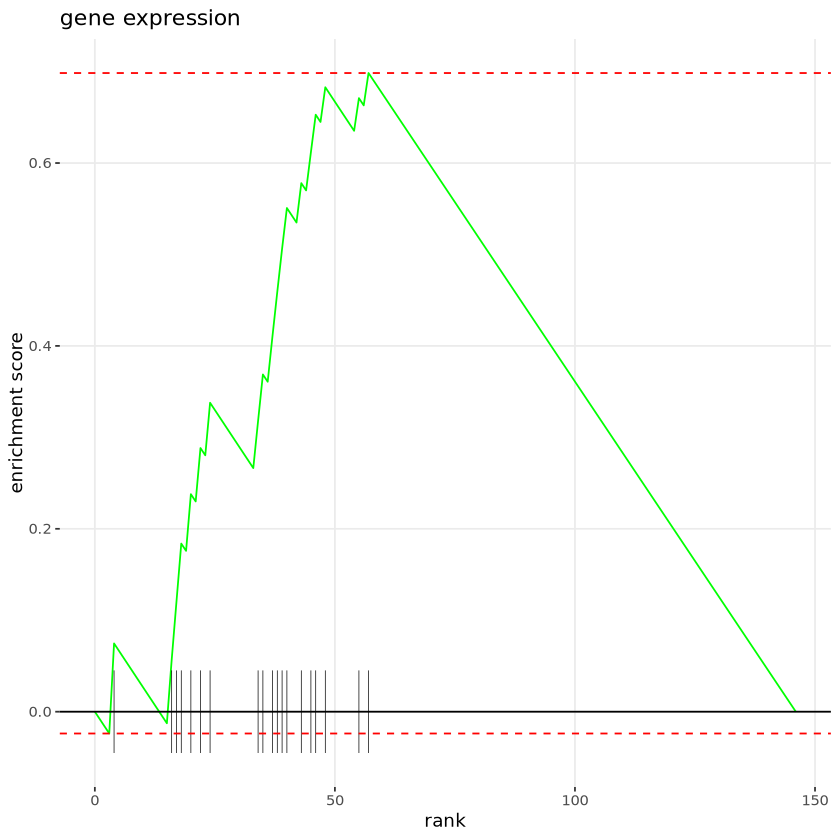

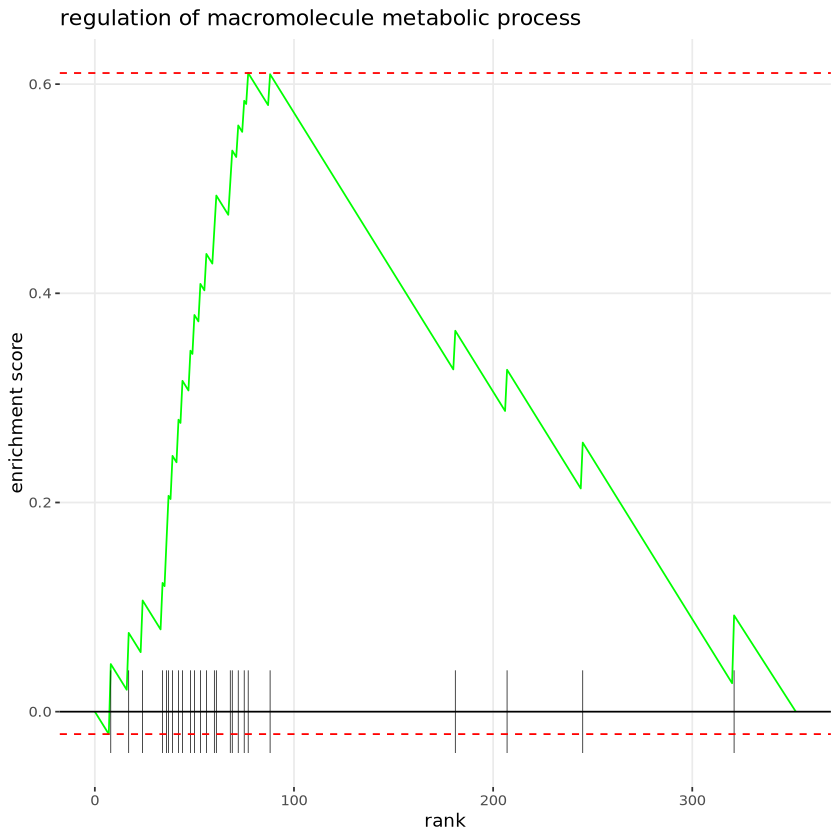

In [66]:
p1a <- plotEnrichment(TomatoGOPathways[[head(fgseaRes1[order(pval), ], 1)$pathway]],
                         TomatoGORanks1) + labs(title = head(fgseaRes1[order(pval), ], 1)$pathway)
p1a

p1b <- plotEnrichment(TomatoGOPathways[[head(fgseaRes2[order(pval), ], 1)$pathway]],
                         TomatoGORanks2) + labs(title = head(fgseaRes2[order(pval), ], 1)$pathway)
p1b

p1 <- p1a + p1b + plot_layout(ncol = 2)

### p2 plotGseaTable()
- 通路，基因条目上下调，NES，padj

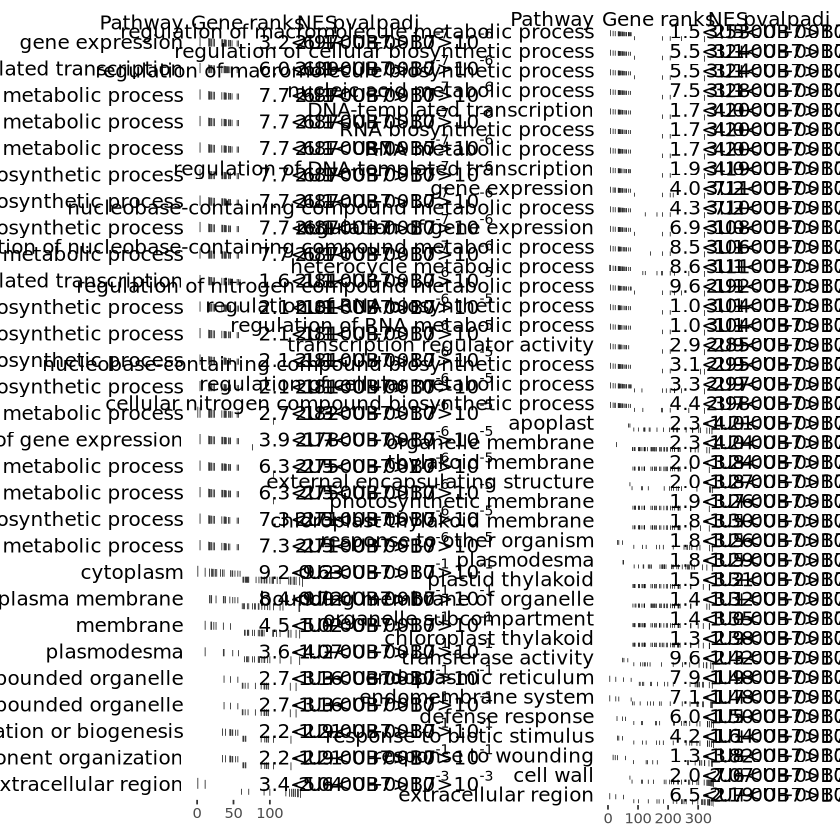

In [68]:
topPathwaysUp1 <- fgseaRes1[ES > 0][head(order(pval), n = 20), pathway]
topPathwaysDown1 <- fgseaRes1[ES < 0][head(order(pval), n = 20), pathway]
topPathways1 <- c(topPathwaysUp1, rev(topPathwaysDown1))
p2a <- plotGseaTable(TomatoGOPathways[topPathways1], TomatoGORanks1, fgseaRes1, gseaParam = 0.5)
p2a

topPathwaysUp2 <- fgseaRes2[ES > 0][head(order(pval), n = 20), pathway]
topPathwaysDown2 <- fgseaRes2[ES < 0][head(order(pval), n = 20), pathway]
topPathways2 <- c(topPathwaysUp2, rev(topPathwaysDown2))
p2b <- plotGseaTable(TomatoGOPathways[topPathways2], TomatoGORanks2, fgseaRes2, gseaParam = 0.5)
p2b

p2 <- p2a + p2b + plot_layout(ncol = 2)

### p3 更严格的padj

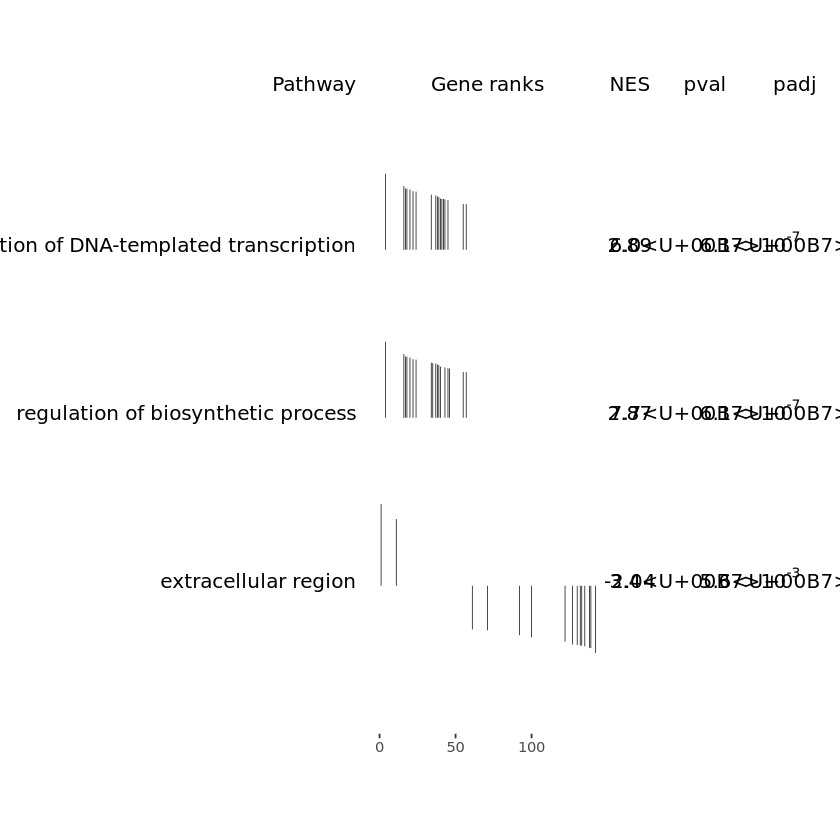

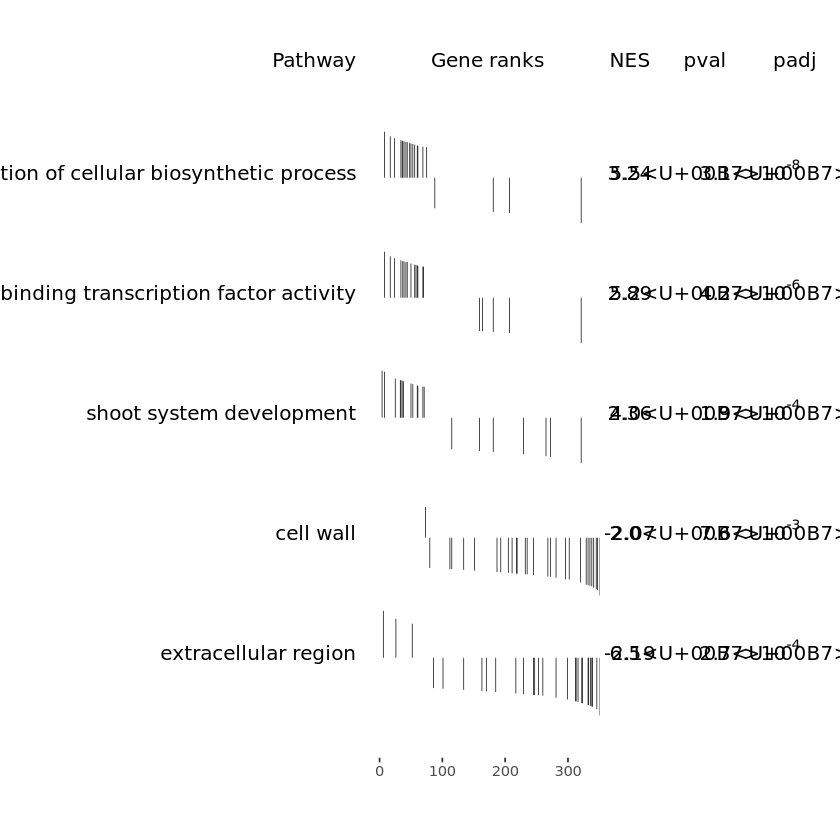

In [71]:
collapsedPathways1 <- collapsePathways(fgseaRes1[order(pval)][padj < 0.01], TomatoGOPathways, TomatoGORanks1)

mainPathways1 <- fgseaRes1[pathway %in% collapsedPathways1$mainPathways][order(-NES), pathway]

p3a <- plotGseaTable(TomatoGOPathways[mainPathways1], TomatoGORanks1, fgseaRes1, gseaParam = 0.5)
p3a

collapsedPathways2 <- collapsePathways(fgseaRes2[order(pval)][padj < 0.01], TomatoGOPathways, TomatoGORanks2)

mainPathways2 <- fgseaRes2[pathway %in% collapsedPathways2$mainPathways][order(-NES), pathway]

p3b <- plotGseaTable(TomatoGOPathways[mainPathways2], TomatoGORanks2, fgseaRes2, gseaParam = 0.5)
p3b

p3 <- p3a + p3b + plot_layout(ncol = 2)

In [74]:
TomatoKEGGRanks1 <- deg1[[log2fc_1]]
names(TomatoKEGGRanks1) <- deg1$Gene 
TomatoKEGGRanks1 <- sort(TomatoKEGGRanks1, decreasing = F) 

fgseaRes_kegg1 <- fgsea(pathways = TomatoKEGGPathways, 
                       stats = TomatoKEGGRanks1,
                       eps = 0.0,
                       minSize = 15,
                       maxSize = 500)


TomatoKEGGRanks2 <- deg2[[log2fc_2]]
names(TomatoKEGGRanks2) <- deg2$Gene 
TomatoKEGGRanks2 <- sort(TomatoKEGGRanks2, decreasing = F) 

fgseaRes_kegg2 <- fgsea(pathways = TomatoKEGGPathways, 
                       stats = TomatoKEGGRanks2,
                       eps = 0.0,
                       minSize = 15,
                       maxSize = 500)
nrow(fgseaRes_kegg2)

[1] 0

[1] 4

In [78]:
if (nrow(fgseaRes_kegg1)==0){
    print('fgseaRes_kegg1 nrow == 0')
    blank_plot <- ggplot() +
    theme_void() +
    labs(title = "No Data Available")
    p4a <- blank_plot
    p5a <- blank_plot
    p6a <- blank_plot
} else {
    p4a <- plotEnrichment(TomatoKEGGPathways[[head(fgseaRes_kegg1[order(pval), ], 1)$pathway]],
                         TomatoKEGGRanks1) + labs(title = head(fgseaRes_kegg1[order(pval), ], 1)$pathway)
    p4a
    
    topPathwaysUp_kegg1 <- fgseaRes_kegg1[ES > 0][head(order(pval), n = 20), pathway]
    topPathwaysDown_kegg1 <- fgseaRes_kegg1[ES < 0][head(order(pval), n = 20), pathway]
    topPathways_kegg1 <- c(topPathwaysUp_kegg1, rev(topPathwaysDown_kegg1))
    p5a <- plotGseaTable(TomatoKEGGPathways[topPathways_kegg1], TomatoKEGGRanks1, fgseaRes_kegg1, gseaParam = 0.5)
    p5a
    
    collapsedPathways_kegg1 <- collapsePathways(fgseaRes_kegg1[order(pval)][padj < 0.01], TomatoKEGGPathways, TomatoKEGGRanks1)
    mainPathways_kegg1 <- fgseaRes_kegg1[pathway %in% collapsedPathways_kegg1$mainPathways][order(-NES), pathway]
    p6a <- plotGseaTable(TomatoKEGGPathways[mainPathways_kegg1], TomatoKEGGRanks1, fgseaRes_kegg1, gseaParam = 0.5)
    p6a
}
    

[1] "fgseaRes_kegg1 nrow == 0"


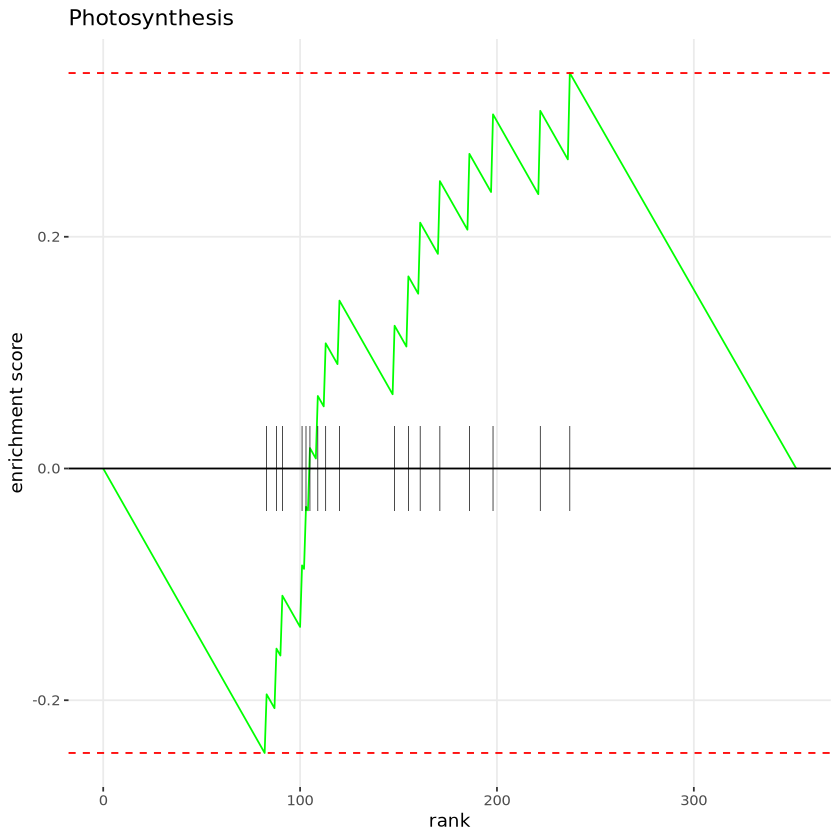

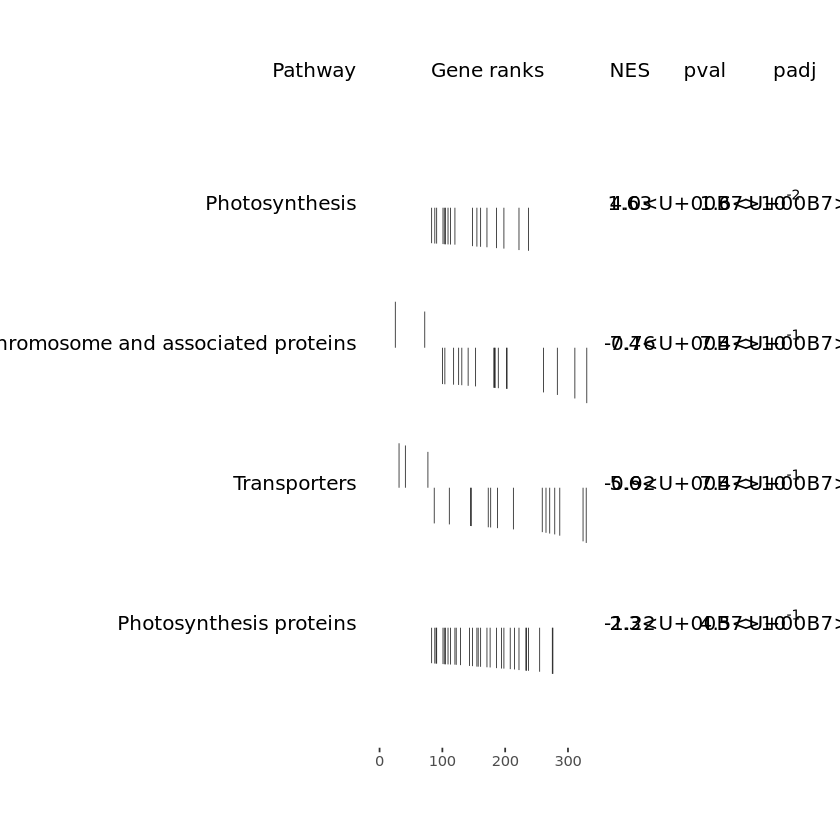

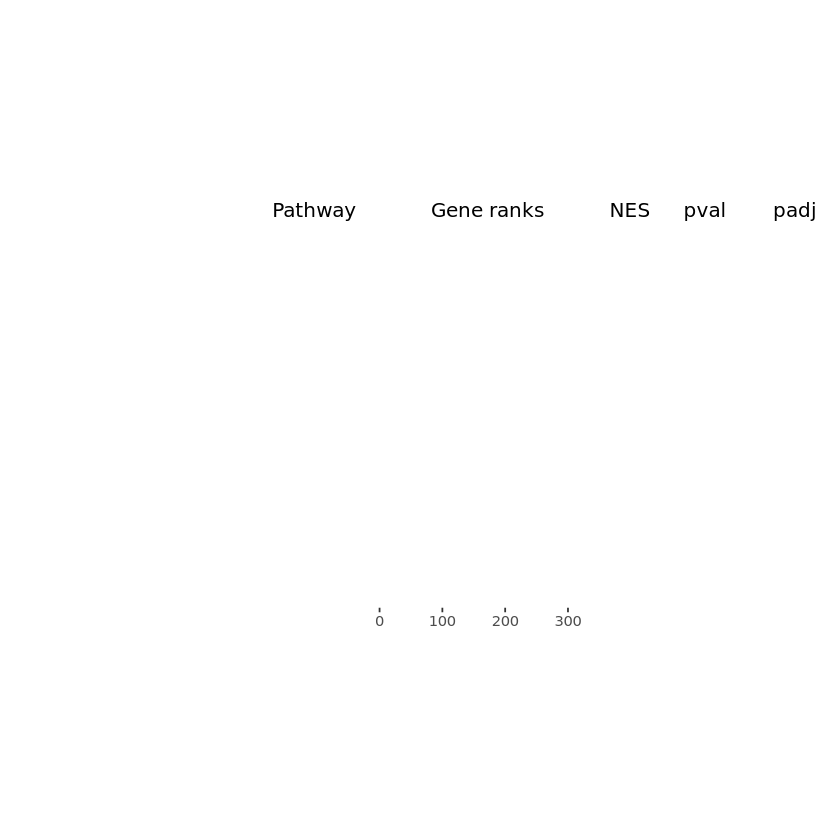

In [83]:
if (nrow(fgseaRes_kegg2)==0){
    print('fgseaRes_kegg2 nrow == 0')
    blank_plot <- ggplot() +
    theme_void() +
    labs(title = "No Data Available")
    p4b <- blank_plot
    p5b <- blank_plot
    p6b <- blank_plot
} else {
    p4b <- plotEnrichment(TomatoKEGGPathways[[head(fgseaRes_kegg2[order(pval), ], 1)$pathway]],
                         TomatoKEGGRanks2) + labs(title = head(fgseaRes_kegg2[order(pval), ], 1)$pathway)
    print(p4b)
    
    topPathwaysUp_kegg2 <- fgseaRes_kegg2[ES > 0][head(order(pval), n = 20), pathway]
    topPathwaysDown_kegg2 <- fgseaRes_kegg2[ES < 0][head(order(pval), n = 20), pathway]
    topPathways_kegg2 <- c(topPathwaysUp_kegg2, rev(topPathwaysDown_kegg2))
    p5b <- plotGseaTable(TomatoKEGGPathways[topPathways_kegg2], TomatoKEGGRanks2, fgseaRes_kegg2, gseaParam = 0.5)
    print(p5b)
    
    collapsedPathways_kegg2 <- collapsePathways(fgseaRes_kegg2[order(pval)][padj < 0.01], TomatoKEGGPathways, TomatoKEGGRanks2)
    mainPathways_kegg2 <- fgseaRes_kegg2[pathway %in% collapsedPathways_kegg2$mainPathways][order(-NES), pathway]
    p6b <- plotGseaTable(TomatoKEGGPathways[mainPathways_kegg2], TomatoKEGGRanks2, fgseaRes_kegg2, gseaParam = 0.5)
    print(p6b)
}



### p4

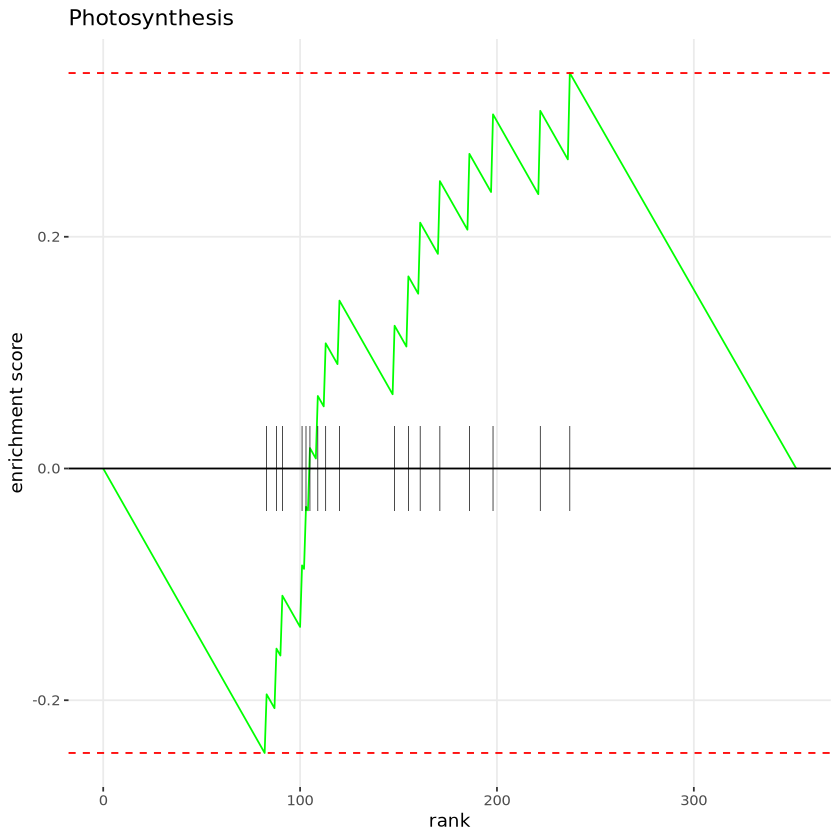

In [75]:


p4 <- p4a + p4b + plot_layout(ncol = 2)

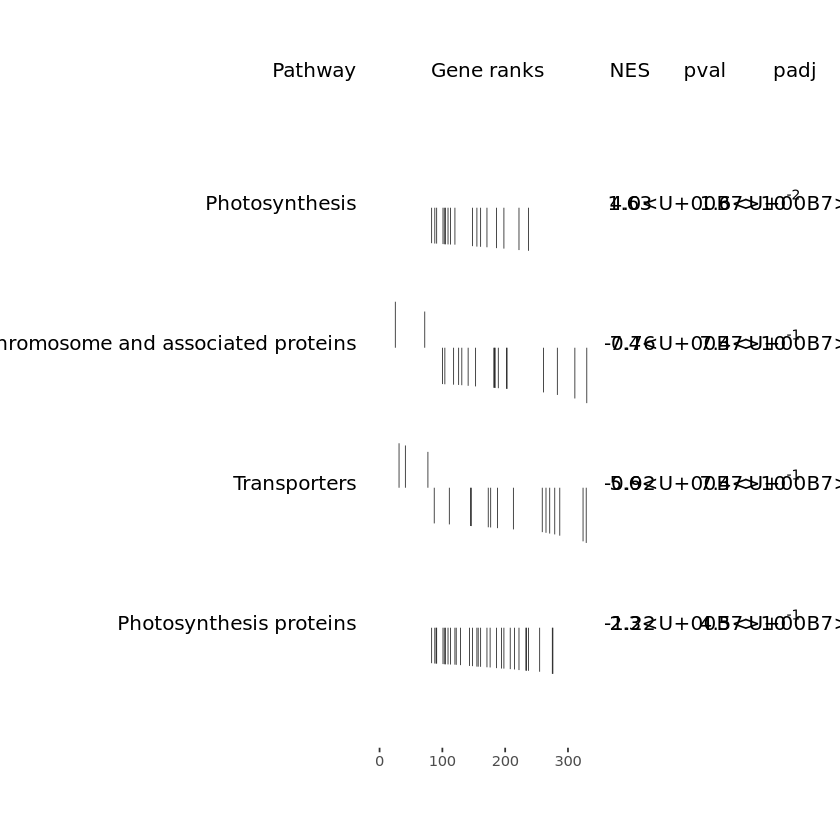

In [76]:


p5 <- p5a + p5b + plot_layout(ncol = 2)

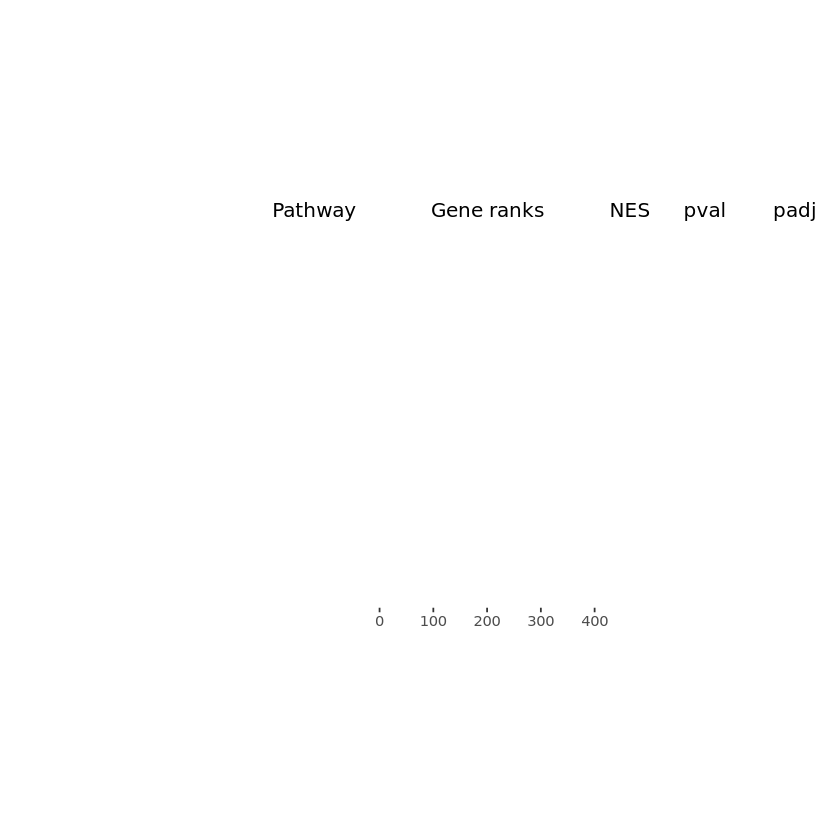

In [ ]:




p6

In [ ]:
pdf(str_c(dir, file_path_sans_ext(basename(file)), "_lof2fc.pdf"), height = 15, width = 15)
print(p1)
print(p2)
print(p3)
print(p4)
print(p5)
print(p6)
dev.off()

In [88]:
Toppathway1 <- fgseaRes1[order(pval),][1,]$pathway
leadingEdgegenes1 <- fgseaRes1[order(pval),][1,]$leadingEdge
leadingEdgegenes_df1 <- data.frame(leadingEdgegenes1)
names(leadingEdgegenes_df1) <- Toppathway1

write.csv(leadingEdgegenes_df1,file = str_c(dir, file_path_sans_ext(basename(file)), "_fgseaRes1_go_leadingEdgegenes.csv"),row.names = FALSE)

Toppathway2 <- fgseaRes2[order(pval),][1,]$pathway
leadingEdgegenes2 <- fgseaRes2[order(pval),][1,]$leadingEdge
leadingEdgegenes_df2 <- data.frame(leadingEdgegenes2)
names(leadingEdgegenes_df2) <- Toppathway2

write.csv(leadingEdgegenes_df2,file = str_c(dir, file_path_sans_ext(basename(file)), "_fgseaRes2_go_leadingEdgegenes.csv"),row.names = FALSE)

In [59]:
Toppathway_kegg1 <- fgseaRes_kegg1[order(pval),][1,]$pathway
leadingEdgegenes_kegg1 <- fgseaRes_kegg1[order(pval),][1,]$leadingEdge
leadingEdgegenes_df_kegg1 <- data.frame(leadingEdgegenes_kegg1)
names(leadingEdgegenes_df_kegg1) <- Toppathway_kegg1

write.csv(leadingEdgegenes_df_kegg1,file = str_c(dir, file_path_sans_ext(basename(file)), "_fgseaRes_kegg1_kegg_leadingEdgegenes.csv"),row.names = FALSE)

Toppathway_kegg <- fgseaRes_kegg[order(pval),][1,]$pathway
leadingEdgegenes_kegg <- fgseaRes_kegg[order(pval),][1,]$leadingEdge
leadingEdgegenes_df_kegg <- data.frame(leadingEdgegenes_kegg)
names(leadingEdgegenes_df_kegg) <- Toppathway_kegg

write.csv(leadingEdgegenes_df_kegg,file = str_c(dir, file_path_sans_ext(basename(file)), "_kegg_leadingEdgegenes.csv"),row.names = FALSE)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (4.72% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
"There were 40 pathways for which P-values were not calculated properly due to unbalanced (positive and negative) gene-level statistic values. For such pathways pval, padj, NES, log2err are set to NA. You can try to increase the value of the argument nPermSimple (for example set it nPermSimple = 10000)"
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
"For some of the pathways the P-values were likely overestimated. For such pathways log2err is set to NA."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (4.87% of the list).
The order of t

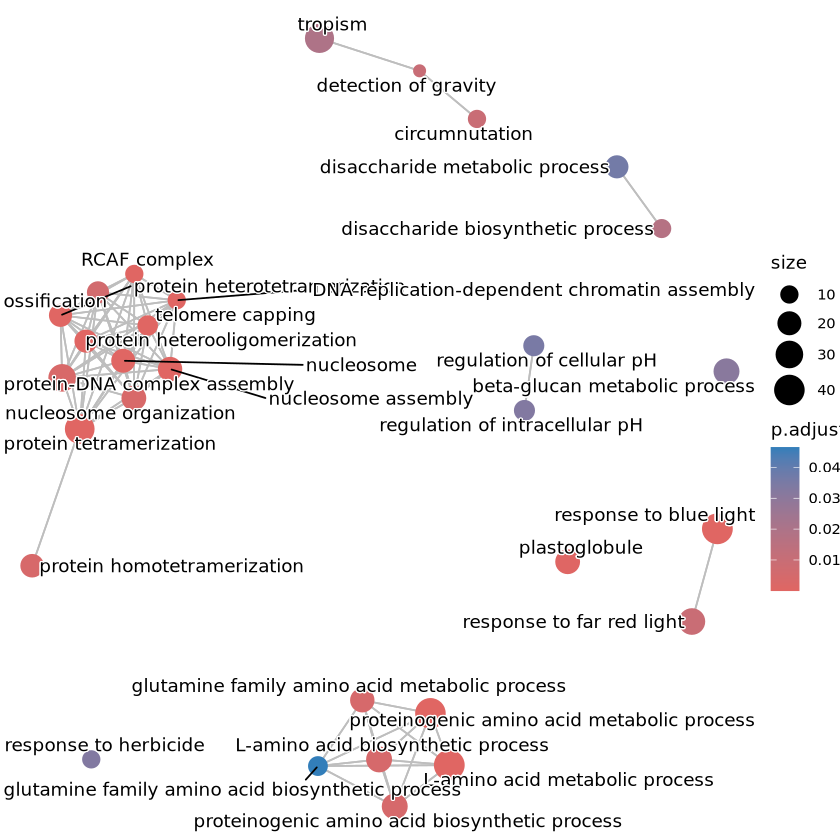

In [23]:
# 用于比较两个时期的基因富集通路占比，杨东可以尝试调试一下，搞不定就先放弃，参考链接：https://yulab-smu.top/biomedical-knowledge-mining-book/clusterprofiler-comparecluster.html

# library(clusterProfiler)
# data(gcSample)
# xx <- compareCluster(gcSample, fun="enrichKEGG",
#                      organism="hsa", pvalueCutoff=0.05)
# xx <- pairwise_termsim(xx)                     
# p1 <- emapplot(xx)
# p2 <- emapplot(xx, legend_n=2) 
# p3 <- emapplot(xx, pie="count")
# p4 <- emapplot(xx, pie="count", cex_category=1.5, layout="kk")
# cowplot::plot_grid(p1, p2, p3, p4, ncol=2, labels=LETTERS[1:4])